# Выявление профилей потребления

В нашем распоряжении данные интернет-магазина товаров для дома "Пока все ещё тут", основная задача: обнаружить группы клиентов, похожих друг на друга, охарактеризовать их для дальнейшей персональной работы с каждой группой. Проведём исследовательский анализ данных и проверим несколько статистических гипотез.

**Материалы:**
Презентация: https://disk.yandex.lt/i/0YMjr7s2B_qVsw

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выручка" data-toc-modified-id="Выручка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выручка</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Средний чек</a></span></li><li><span><a href="#Средняя-выручка-с-покупателя" data-toc-modified-id="Средняя-выручка-с-покупателя-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Средняя выручка с покупателя</a></span></li><li><span><a href="#Количество-заказов-на-покупателя" data-toc-modified-id="Количество-заказов-на-покупателя-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Количество заказов на покупателя</a></span></li><li><span><a href="#Сезонность-товаров" data-toc-modified-id="Сезонность-товаров-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Сезонность товаров</a></span></li></ul></li><li><span><a href="#Сегментация-покупателей" data-toc-modified-id="Сегментация-покупателей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегментация покупателей</a></span><ul class="toc-item"><li><span><a href="#По-выручке-с-покупателя" data-toc-modified-id="По-выручке-с-покупателя-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>По выручке с покупателя</a></span></li><li><span><a href="#По-количеству-заказов-на-покупателя" data-toc-modified-id="По-количеству-заказов-на-покупателя-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>По количеству заказов на покупателя</a></span></li><li><span><a href="#По-сезонности-покупок" data-toc-modified-id="По-сезонности-покупок-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>По сезонности покупок</a></span></li><li><span><a href="#По-категориям-товаров" data-toc-modified-id="По-категориям-товаров-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>По категориям товаров</a></span></li></ul></li><li><span><a href="#Проверка-гиптез" data-toc-modified-id="Проверка-гиптез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гиптез</a></span><ul class="toc-item"><li><span><a href="#Выручка-мультипокупателей" data-toc-modified-id="Выручка-мультипокупателей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выручка мультипокупателей</a></span></li><li><span><a href="#Количество-заказов-мультипокупателей" data-toc-modified-id="Количество-заказов-мультипокупателей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество заказов мультипокупателей</a></span></li><li><span><a href="#Средний-чек-сегмента-других-товаров" data-toc-modified-id="Средний-чек-сегмента-других-товаров-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Средний чек сегмента других товаров</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Предобработка данных

Познакомимся с данным и проведём предварительную подготовку данных для дальнейшего анализа.

In [1]:
#подключаем библиотеки
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import requests 
from urllib.parse import urlencode 

In [2]:
#определим стиль для будущих графиков
plt.style.use('seaborn-pastel')

### Знакомство с данными

Загрузим данные в датафрейм, изучим общую информацию о представленных данных, а также за какой период представлены данные. Приведём все значения к корректному формату.

In [3]:
#загружаем данные в датафрейм и посмотрим первые пять строк
df = pd.read_csv('/datasets/ecom_dataset_upd.csv')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


В датафрейме представлены следующие данные:
- *date* — дата заказа;
- *customer_id* — идентификатор покупателя;
- *order_id* — идентификатор заказа;
- *product* — наименование товара;
- *quantity* — количество товара в заказе;
- *price* — цена товара.

In [4]:
#изучим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Формат даты заказа некорректный, изменим его на формат *datetime*

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

Посмотрим, за какой период представлены данные

In [6]:
print('Данные представлены с', df['date'].min(), 'по', df['date'].max())
print('За период:', df['date'].max() - df['date'].min())

Данные представлены с 2018-10-01 00:00:00 по 2020-01-31 15:00:00
За период: 487 days 15:00:00


Заранее мы подготовили файл с категориями товаров в файле excel (использовали уникальные названия товаров), в которые вошли:
- bathroom (товары для ванной комнаты, туалета и товары для уборки),
- cooking_items (товары для приготовления еды),
- decor (товары для оформления интерьера)
- household_facilities (хозяйственнные средства и принадлежности)
- houseplant (комнатные растения)
- seedling (семена и рассада)
- storage (товары для организации хранения)
- table_items (столовые принадлежности)
- textile (текстильные принадлежности)
- other (другие товары, в том числе инструменты и электротовары для дома)

In [7]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.lt/i/KlfEIphmQHg4vw' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в categories 
download_response = requests.get(download_url) 
categories = pd.read_excel(download_url) 

In [8]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product     2341 non-null   object
 1   categories  2341 non-null   object
dtypes: object(2)
memory usage: 36.7+ KB


Мы загрузили данные по покупкам в датафрейм df, данные по покупкам представлены за 487 дней с 1 октября 2018 года по 31 января 2020 года. Предварительно мы разделили данные на 10 категорий и также загрузили данные в датафрейм (categories). Далее мы приступим к предобработке данных.

### Пропущенные значения

Проверим, есть ли в данных пропущенные значения. 

In [9]:
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

В данных не обнаружено пропущенных значений.

### Дубликаты

Проверим, есть ли в данных дубликаты и что с ними сделать.

In [10]:
df.duplicated().sum()

0

Полных дубликатов не обнаружено, проверим дубликаты по ключевым столбцам: номеру заказа и продукту

In [11]:
# теперь проверим по столбцу name
df.duplicated(subset=['order_id', 'product']).sum()

1920

Посмотрим, какой характер носят эти дубликаты

In [12]:
df[df.duplicated(subset=['order_id', 'product']) == True]

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


1920 дубликатов по номеру заказа и названию продукта, можно отметить, что дубликатам соответствуют разные временны отрезки, а также они присутствуют в данных до 31.10.2019, это может быть связано с добавлением в заказ товаров в разное время и технической особенностью. Не трогаем данные дубликаты, так как их объём составляет 25% от общего количества покупок.

Убедимся, что в данных на один заказ одна дата и один покупатель. Объединим данные по номеру заказа и посмотрим есть ли заказы оформленные на разных пользователей.

In [13]:
dub = df.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False)
dub = dub[dub > 1]
print(dub)
print()
print('Количество заказов, оформленных более, чем одним покупателем:', len(dub))

order_id
72845    4
71480    3
69485    3
69410    2
71226    2
69283    2
72950    2
70631    2
69531    2
69833    2
70946    2
70808    2
71054    2
69345    2
72778    2
72188    2
71542    2
68785    2
69310    2
71571    2
72790    2
70114    2
14872    2
71663    2
70726    2
71461    2
70903    2
70542    2
71648    2
Name: customer_id, dtype: int64

Количество заказов, оформленных более, чем одним покупателем: 29


В данных присутствуют 29 заказoв, созданные разными пользователями. Посмотрим на эти заказы.

In [14]:
df[df['order_id'] == 72845]

,date,customer_id,order_id,product,quantity,price
6504,2019-10-03 14:00:00,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6505,2019-10-03 15:00:00,0309d37c-ab5f-4793-ba72-5484c019b840,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6538,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0


Дублируются товары, но отличается время, скорее всего произошла техническая ошибка и пользователи могли несколько раз предпринимать попытку оформить заказ, без создания личного кабинета. Будем считать, что в таких случаях заказ сформированный последним - является реальным и оплаченным. Остальные удаляем.

In [15]:
df = df.drop(index=[6504, 6505, 6508])

In [16]:
df[df['order_id'] == 71480]

,date,customer_id,order_id,product,quantity,price
3963,2019-05-21 02:00:00,4bd9c1e8-b2cc-4ec5-97eb-28d8f3c22d8d,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0
4025,2019-05-24 22:00:00,d8080f8f-3685-433b-b416-beb0a8f06606,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0
4026,2019-05-25 02:00:00,51f04abe-a71a-4694-87b7-ad9ef4930e51,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0


In [17]:
df = df.drop(index=[3963, 4025])

In [18]:
df[df['order_id'] == 69485]

,date,customer_id,order_id,product,quantity,price
1282,2018-12-20 16:00:00,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,Набор столовых приборов 24 предмета SAINT GERM...,1,1087.0
1292,2018-12-21 11:00:00,266beb08-ec9b-43b4-89bb-ac60fa23ffee,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274.0
1384,2018-12-26 23:00:00,e0461045-4fcc-4731-8837-509f6534512a,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274.0


Заказ один и тип с количеством товара одинаковый, но разные производители, оставляем последний заказ.

In [19]:
df = df.drop(index=[1282, 1292])

In [20]:
df[df['order_id'] == 69410]

,date,customer_id,order_id,product,quantity,price
1237,2018-12-17 14:00:00,4ea06f66-0876-4dec-8d14-ea994ffe435f,69410,Муляж Желудь 2 шт,3,22.0
1258,2018-12-18 20:00:00,caaa3f41-c9ab-4e3d-8b75-94e1d3a8d7b4,69410,Муляж Желудь 2 шт,3,22.0


In [21]:
df = df.drop(index=1237)

In [22]:
df[df['order_id'] == 71226]

,date,customer_id,order_id,product,quantity,price
2996,2019-04-21 15:00:00,c912fec9-fd4f-41b7-bb04-4548740b276b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569.0
2998,2019-04-21 19:00:00,fd4af93f-9fbd-449f-91f8-b42b830e265b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569.0


In [23]:
df = df.drop(index=2996)

In [24]:
df[df['order_id'] == 69283]

,date,customer_id,order_id,product,quantity,price
1154,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
1160,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0


In [25]:
df = df.drop(index=1154)

In [26]:
df[df['order_id'] == 72950]

,date,customer_id,order_id,product,quantity,price
6601,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0
6606,2019-10-14 09:00:00,2f1671cc-47eb-49bb-a40b-808375f4218b,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0


In [27]:
df = df.drop(index=6601)

In [28]:
df[df['order_id'] == 70631]

,date,customer_id,order_id,product,quantity,price
2211,2019-03-06 13:00:00,411ab440-0631-422d-9999-8d5ef8cec0e2,70631,Искусственная композиция из цветов пластиковая...,1,74.0
2228,2019-03-07 07:00:00,d1bf7700-6afa-4297-9220-48e6aa0d7e2c,70631,Искусственная композиция из цветов пластиковая...,1,74.0


In [29]:
df = df.drop(index=2211)

In [30]:
df[df['order_id'] == 69531]

,date,customer_id,order_id,product,quantity,price
1323,2018-12-23 14:00:00,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
1338,2018-12-24 08:00:00,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
1417,2018-12-28 23:00:00,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
1422,2019-01-01 10:00:00,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
1429,2019-01-03 08:00:00,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
1438,2019-01-05 09:00:00,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
1443,2019-01-06 08:00:00,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
1449,2019-01-07 09:00:00,2273b174-e223-415a-9be1-49d19abea06e,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
2123,2019-03-02 14:00:00,2273b174-e223-415a-9be1-49d19abea06e,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0
2174,2019-03-04 16:00:00,2273b174-e223-415a-9be1-49d19abea06e,69531,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,4139.0


Два пользователя в течении 4 месяцев офомляли один заказ, оставим данные второго пользователя, добавленные строки в марте

In [31]:
df = df.drop(index=[1323, 1338, 1417, 1422, 1429, 1438, 1443, 1449])

In [32]:
df[df['order_id'] == 69833]

,date,customer_id,order_id,product,quantity,price
1519,2019-01-15 17:00:00,631c5729-d163-4270-8956-4d9832085d0e,69833,Чехол Eurogold Clean Metallic металлизированый...,2,299.0
1583,2019-01-23 19:00:00,a684bf62-f75c-4e82-aa74-6d02b127b439,69833,Чехол Eurogold Clean Metallic металлизированый...,2,299.0


In [33]:
df = df.drop(index=1519)

In [34]:
df[df['order_id'] == 70946]

,date,customer_id,order_id,product,quantity,price
2579,2019-04-01 09:00:00,6a4d397b-8f89-4382-89b3-9ef535eee80d,70946,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0
3467,2019-05-08 16:00:00,753660bf-a1ea-4447-853d-622e47c1c6ac,70946,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0


In [35]:
df = df.drop(index=2579)

In [36]:
df[df['order_id'] == 70808]

,date,customer_id,order_id,product,quantity,price
2409,2019-03-20 15:00:00,78e8c0e7-4888-4a75-8137-a90f02a6cb8c,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727.0
2410,2019-03-20 16:00:00,ad1630b2-fc36-4961-900a-46612ff6c655,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727.0


In [37]:
df = df.drop(index=2409)

In [38]:
df[df['order_id'] == 71054]

,date,customer_id,order_id,product,quantity,price
2720,2019-04-07 19:00:00,d713f977-a28f-4c34-ae9a-d132068e64f3,71054,Вешалка-плечики без эссенции цвет тёмно-розовы...,10,43.0
2744,2019-04-08 18:00:00,d713f977-a28f-4c34-ae9a-d132068e64f3,71054,Вешалка-плечики без эссенции цвет тёмно-розовы...,10,43.0
3348,2019-05-01 18:00:00,d713f977-a28f-4c34-ae9a-d132068e64f3,71054,Вешалка-плечики без эссенции цвет тёмно-розовы...,10,43.0
3389,2019-05-03 13:00:00,d713f977-a28f-4c34-ae9a-d132068e64f3,71054,Вешалка-плечики без эссенции цвет тёмно-розовы...,10,43.0
4609,2019-06-05 09:00:00,34572907-a445-4b40-b1b6-fd0cbfa653b1,71054,Вешалка-плечики без эссенции цвет тёмно-розовы...,10,43.0


In [39]:
df = df.drop(index=[2720, 2744, 3348, 3389])

In [40]:
df[df['order_id'] == 69345]

,date,customer_id,order_id,product,quantity,price
1196,2018-12-13 19:00:00,70d60304-4b3c-4f34-9430-1872ec6e6309,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0
1209,2018-12-15 07:00:00,22e4d79f-3613-4c22-8b01-7f880120bf5a,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0


In [41]:
df = df.drop(index=1196)

In [42]:
df[df['order_id'] == 72778]

,date,customer_id,order_id,product,quantity,price
6440,2019-09-27 00:00:00,9777b839-4212-41bb-94c2-87de3658248a,72778,Шеффлера Голд Капелла d-12 см h-25 см,1,149.0
6576,2019-10-10 22:00:00,31a39955-8a93-42f3-8839-04a9693632a7,72778,Шеффлера Голд Капелла d-12 см h-25 см,1,149.0


In [43]:
df = df.drop(index=6440)

In [44]:
df[df['order_id'] == 72188]

,date,customer_id,order_id,product,quantity,price
6026,2019-08-02 15:00:00,da6f7bf7-f699-4046-a4dd-cab0c27debcb,72188,Муляж Персики мини полиуретан d-6 см,1,22.0
6030,2019-08-03 13:00:00,55b8d928-77f8-40fc-a2e9-08424d13b0e4,72188,Муляж Персики мини полиуретан d-6 см,1,22.0


In [45]:
df = df.drop(index=6026)

In [46]:
df[df['order_id'] == 71542]

,date,customer_id,order_id,product,quantity,price
4089,2019-05-28 21:00:00,5ee242e4-7610-43bc-88a6-6ae2d886797f,71542,Салатник Luminarc КУТЮР 27 см H3529,1,299.0
4124,2019-05-29 18:00:00,5ee242e4-7610-43bc-88a6-6ae2d886797f,71542,Салатник Luminarc КУТЮР 27 см H3529,1,299.0
6064,2019-08-07 10:00:00,52ca850d-ce65-4445-bddc-b0b063b13ba7,71542,Салатник Luminarc КУТЮР 27 см H3529,1,299.0


In [47]:
df = df.drop(index=[4089, 4124])

In [48]:
df[df['order_id'] == 68785]

,date,customer_id,order_id,product,quantity,price
512,2018-10-28 22:00:00,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
538,2018-10-30 21:00:00,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0


In [49]:
df = df.drop(index=512)

In [50]:
df[df['order_id'] == 69310]

,date,customer_id,order_id,product,quantity,price
1177,2018-12-11 21:00:00,954172a5-634c-4a50-941d-9db6d15a7377,69310,"Муляж Груша желтый 9,5 см полиуретан",7,59.0
1195,2018-12-13 18:00:00,954172a5-634c-4a50-941d-9db6d15a7377,69310,"Муляж Груша желтый 9,5 см полиуретан",7,59.0
1226,2018-12-16 21:00:00,954172a5-634c-4a50-941d-9db6d15a7377,69310,"Муляж Груша желтый 9,5 см полиуретан",7,59.0
1674,2019-02-03 22:00:00,845d52ce-9420-4c44-b4b5-3fb55c792084,69310,"Муляж Груша желтый 9,5 см полиуретан",7,59.0


In [51]:
df = df.drop(index=[1177, 1195, 1226])

In [52]:
df[df['order_id'] == 71571]

,date,customer_id,order_id,product,quantity,price
4297,2019-06-02 10:00:00,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0
4298,2019-06-02 10:00:00,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


In [53]:
df = df.drop(index=4297)

In [54]:
df[df['order_id'] == 72790]

,date,customer_id,order_id,product,quantity,price
6447,2019-09-28 10:00:00,a3d7fb5c-d3fb-40d6-b060-47a7061ca442,72790,Сушилка для белья потолочно-настенная Gimi Lif...,1,1424.0
6449,2019-09-28 13:00:00,a3d7fb5c-d3fb-40d6-b060-47a7061ca442,72790,Сушилка для белья потолочно-настенная Gimi Lif...,1,1424.0
6474,2019-09-30 09:00:00,07b63f16-aa4a-4acc-a7a5-af941fd4b0a9,72790,Сушилка для белья потолочно-настенная Gimi Lif...,1,1424.0


In [55]:
df = df.drop(index=[6447, 6449])

In [56]:
df[df['order_id'] == 70114]

,date,customer_id,order_id,product,quantity,price
1706,2019-02-05 20:00:00,673d44a3-9cec-4c2f-b0c6-9be4952ddc7c,70114,Вешалка-плечики без эссенции цвет тёмно-розовы...,30,40.0
1764,2019-02-09 20:00:00,b827d1a8-5e5d-4a44-9813-2bd669471a73,70114,Вешалка-плечики без эссенции цвет тёмно-розовы...,30,40.0


In [57]:
df = df.drop(index=1706)

In [58]:
df[df['order_id'] == 14872]

,date,customer_id,order_id,product,quantity,price
5518,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния махровая в кассете...,2,82.0
5519,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния простая в кассете ...,1,82.0
5520,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Петуния махровая рассада однолетних цветов в к...,1,128.0
5545,2019-06-22 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния махровая в кассете...,2,82.0
5546,2019-06-22 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния простая в кассете ...,1,82.0
5547,2019-06-22 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Петуния махровая рассада однолетних цветов в к...,1,128.0
5549,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Однолетнее растение Петуния махровая в кассете...,2,82.0
5550,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Однолетнее растение Петуния простая в кассете ...,1,82.0
5551,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Петуния махровая рассада однолетних цветов в к...,1,128.0


2 покупателя, 3 дня и 3 товара, оставим последнюю попытку оформить заказ

In [59]:
df = df.drop(index=[5518, 5519, 5520, 5545, 5546, 5547])

In [60]:
df[df['order_id'] == 71663]

,date,customer_id,order_id,product,quantity,price
5020,2019-06-10 13:00:00,11a9ee7f-c1af-48eb-ab82-bfe5dbc0ab02,71663,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0
5073,2019-06-11 08:00:00,11a9ee7f-c1af-48eb-ab82-bfe5dbc0ab02,71663,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0
5570,2019-06-25 09:00:00,11a9ee7f-c1af-48eb-ab82-bfe5dbc0ab02,71663,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0
6257,2019-09-05 12:00:00,a7ef9c85-57e1-45ad-89c9-8b405339d4c8,71663,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0


In [61]:
df = df.drop(index=[5020, 5073, 5570])

In [62]:
df[df['order_id'] == 70726]

,date,customer_id,order_id,product,quantity,price
2322,2019-03-14 05:00:00,af96cc67-1726-43ba-bca1-1da7b78cb33a,70726,Пеларгония розебудная Red Pandora укорененный ...,2,134.0
2323,2019-03-14 07:00:00,95d61179-404e-4ebd-9762-29d800b1583e,70726,Пеларгония розебудная Red Pandora укорененный ...,2,134.0
2369,2019-03-18 09:00:00,95d61179-404e-4ebd-9762-29d800b1583e,70726,Пеларгония розебудная Red Pandora укорененный ...,2,134.0


In [63]:
df = df.drop(index=2322)

In [64]:
df[df['order_id'] == 71461]

,date,customer_id,order_id,product,quantity,price
3932,2019-05-19 19:00:00,79162ad6-b2f0-491a-b3fb-2376c9001b63,71461,"Коврик придверный с дизайном, из резины и коко...",1,1642.0
3937,2019-05-20 08:00:00,9ecc5887-b4d4-4cea-b446-88748df71d9c,71461,"Коврик придверный с дизайном, из резины и коко...",1,1642.0


In [65]:
df = df.drop(index=3932)

In [66]:
df[df['order_id'] == 70903]

,date,customer_id,order_id,product,quantity,price
2491,2019-03-28 10:00:00,5e5a3e1a-0388-4131-a770-f6e3b696985b,70903,Средство против засоров в системах водопровода...,1,104.0
3344,2019-05-01 01:00:00,718316fc-bdf3-4d1d-b8f1-a5c763238ff4,70903,Средство против засоров в системах водопровода...,1,142.0


In [67]:
df = df.drop(index=2491)

In [68]:
df[df['order_id'] == 70542]

,date,customer_id,order_id,product,quantity,price
2118,2019-03-01 19:00:00,b883aae0-25ef-4c5c-8d35-4c6ae8517f1c,70542,Миксер электрический погружной DELTA DL-5061 б...,1,959.0
2276,2019-03-10 22:00:00,00c95d20-923e-4b45-88fc-53b12931d462,70542,Миксер электрический погружной DELTA DL-5061 б...,1,959.0


In [69]:
df = df.drop(index=2118)

In [70]:
df[df['order_id'] == 71648]

,date,customer_id,order_id,product,quantity,price
4909,2019-06-09 07:00:00,6921ac3e-bfcd-4a05-95d3-12ef81e874cc,71648,Сушилка для белья потолочная ЛИАНА ЛЮКС 250 см...,1,704.0
5343,2019-06-15 14:00:00,a843e87d-c9b8-475a-96fb-1edcccca5f8e,71648,Сушилка для белья потолочная ЛИАНА ЛЮКС 250 см...,1,704.0


In [71]:
df = df.drop(index=4909)

In [72]:
print('Осталось', len(df), 'строк датафрейма')

Осталось 7420 строк датафрейма


Мы вручную удалили дубликаты по заказам с разными покупателями, исключив 54 строки заказа. Теперь проверим дубликаты заказов по времени и продукту.

In [73]:
df.duplicated(subset=['customer_id', 'order_id', 'product']).sum()

1867

1867 дубликатов по одному покупателю, заказу и продукту, удалим их.

In [74]:
df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product'])

Выведем актуальную информацию о датафрейме

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5553 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5553 non-null   datetime64[ns]
 1   customer_id  5553 non-null   object        
 2   order_id     5553 non-null   int64         
 3   product      5553 non-null   object        
 4   quantity     5553 non-null   int64         
 5   price        5553 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 303.7+ KB


### Добавление новых столбцов

Добавим столбцы для дальнейшего исследовательского анализа: данные о месяце покупки, дне недели покупки, группе товаров, сумме за позицию.

Сначала мы добавим сумму за позицию в заказе, так как в наших данных представлена только стоимость и количество позиций.

In [76]:
df['amount'] = df['quantity'] * df['price']

Добавим столбец с категорией товара

In [77]:
df = df.merge(categories[['product', 'categories']],  how='left', on='product')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5553 entries, 0 to 5552
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5553 non-null   datetime64[ns]
 1   customer_id  5553 non-null   object        
 2   order_id     5553 non-null   int64         
 3   product      5553 non-null   object        
 4   quantity     5553 non-null   int64         
 5   price        5553 non-null   float64       
 6   amount       5553 non-null   float64       
 7   categories   5549 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 390.4+ KB


4 продукта не получили свою категорию, посмотрим, какие именно

In [79]:
df[df['categories'].isna() == True]

,date,customer_id,order_id,product,quantity,price,amount,categories
1378,2019-01-28 13:00:00,b2b00631-8a7a-4c61-8993-282b28ab3a6e,70000,Роза Патио оранжевая d-12 см h-30,1,374.0,374.0,NaN
1881,2019-03-05 18:00:00,b356c131-659c-49df-8a51-12ae0ddb391b,70619,Роза Кордана белая d-10 см h-20,2,307.0,614.0,NaN
5089,2019-12-08 11:00:00,c41cd9ac-1385-430b-ac97-f4613802e16d,103822,Роза Патио оранжевая d-12 см h-30,1,374.0,374.0,NaN
5440,2020-01-17 12:00:00,876e2d08-bc93-4b66-87aa-43afeb7460c5,106158,Роза Кордана белая d-10 см h-20,1,307.0,307.0,NaN


Все пропущенные значения - относятся к категории комнатных растений, заменим их вручную

In [80]:
df['categories'] = df['categories'].fillna('houseplant')

Добавим данные о дате без времени, месяце, неделе покупки и годе.

In [81]:
df['date_1'] = df['date'].dt.date
df['date_month'] = df['date'].dt.month
df['date_year'] = df['date'].dt.year
df['date_weekday'] = df['date'].dt.weekday

Проверим корректность добавленных столбцов

In [82]:
df

,date,customer_id,order_id,product,quantity,price,amount,categories,date_1,date_month,date_year,date_weekday
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,houseplant,2018-10-01,10,2018,0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,houseplant,2018-10-01,10,2018,0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,houseplant,2018-10-01,10,2018,0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,seedling,2018-10-01,10,2018,0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,houseplant,2018-10-01,10,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5548,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,seedling,2020-01-30,1,2020,3
5549,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,seedling,2020-01-30,1,2020,3
5550,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,storage,2020-01-31,1,2020,4
5551,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,seedling,2020-01-31,1,2020,4


Мы добавили четыре дополнительных столбца для дальнейшего исследовательского анализа данных.

## Исследовательский анализ данных 

Проведём исследовательский анализ данных, изучим представленные данные и закономерности.

### Выручка

Исследуем как меняется объём выручки по месяцам и по дням недели. В какие месяцы и дни недели объём выручки выше, в какой ниже.

Для начала мы суммируем выручку по году и месяцу и посмотрим, как менялся объём продаж за весь период

In [83]:
print('Общая выручка магазина за весь исследуемый период:', round(df['amount'].sum(), 2))

Общая выручка магазина за весь исследуемый период: 4610584.42


In [84]:
date_pivot = pd.pivot_table(df,
                            index=['date_year','date_month'],
                            values='amount',
                            aggfunc='sum').reset_index()
date_pivot['date_year'] = date_pivot['date_year'].astype('str')
date_pivot['date_month'] = date_pivot['date_month'].astype('str')
date_pivot['date'] = date_pivot['date_month'] + '.' + date_pivot['date_year']
date_pivot = date_pivot[['date', 'amount']]
#округлим данные по выручке до 1000 и до 3 цифр после запятой
date_pivot['amount'] = round((date_pivot['amount'] / 1000), 3)

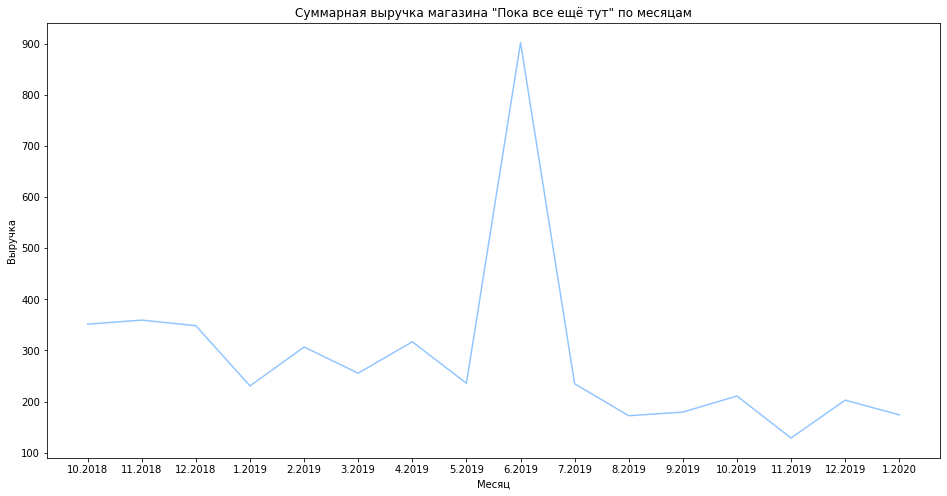

In [85]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=date_pivot) 
ax.set_title('Суммарная выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Выручка магазина с течением времени падает, при этом в июне 2019 года заметен скачок продаж на сумму более 1 млн, нужно посмотреть, какие это были продажи и с чем это могло быть связано. Была ли это одна крупная покупка или это большое количество заказов разных покупателей.

In [86]:
df_june = df[df['date_month'] == 6]
print('Заказов в июне было совершено:', len(df_june['order_id'].unique()))
print('Количество единиц товара проданных в июне:', df_june['quantity'].sum())
print('Количество покупателей, совершивших покупку в июне:', len(df_june['customer_id'].unique()))

Заказов в июне было совершено: 161
Количество единиц товара проданных в июне: 1913
Количество покупателей, совершивших покупку в июне: 151


In [87]:
june_orders = pd.pivot_table(df_june,
                                index='order_id',
                                values=['amount', 'quantity'],
                                aggfunc='sum').reset_index()
june_orders = june_orders.sort_values(by='amount', ascending=False)
june_orders.head(10)

,order_id,amount,quantity
123,71743,675000.0,1000
86,71668,49432.0,334
50,71598,11400.0,10
96,71685,8832.0,8
89,71674,7004.0,1
90,71677,6809.0,1
97,71687,6614.0,1
73,71642,6494.0,1
66,71633,5549.0,1
64,71623,4040.0,20


Действительно, в июне был крупный заказ на 1000 позиций и 675 000, так как мы заведомо знаем, что заказ был тестовым - удаляем его из данных.

In [88]:
ecom = df[df['order_id'] != 71743]
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5552 entries, 0 to 5552
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5552 non-null   datetime64[ns]
 1   customer_id   5552 non-null   object        
 2   order_id      5552 non-null   int64         
 3   product       5552 non-null   object        
 4   quantity      5552 non-null   int64         
 5   price         5552 non-null   float64       
 6   amount        5552 non-null   float64       
 7   categories    5552 non-null   object        
 8   date_1        5552 non-null   object        
 9   date_month    5552 non-null   int64         
 10  date_year     5552 non-null   int64         
 11  date_weekday  5552 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 563.9+ KB


Мы создали новый датафрейм без тестового заказа. Посмотрим теперь на выручку по месяцам.

In [89]:
date_pivot_new = pd.pivot_table(ecom,
                            index=['date_year','date_month'],
                            values='amount',
                            aggfunc='sum').reset_index()
date_pivot_new['date_year'] = date_pivot_new['date_year'].astype('str')
date_pivot_new['date_month'] = date_pivot_new['date_month'].astype('str')
date_pivot_new['date'] = date_pivot_new['date_month'] + '.' + date_pivot_new['date_year']
date_pivot_new = date_pivot_new[['date', 'amount']]
#округлим данные по выручке до 1000 и до 3 цифр после запятой
date_pivot_new['amount'] = round((date_pivot_new['amount'] / 1000), 3)

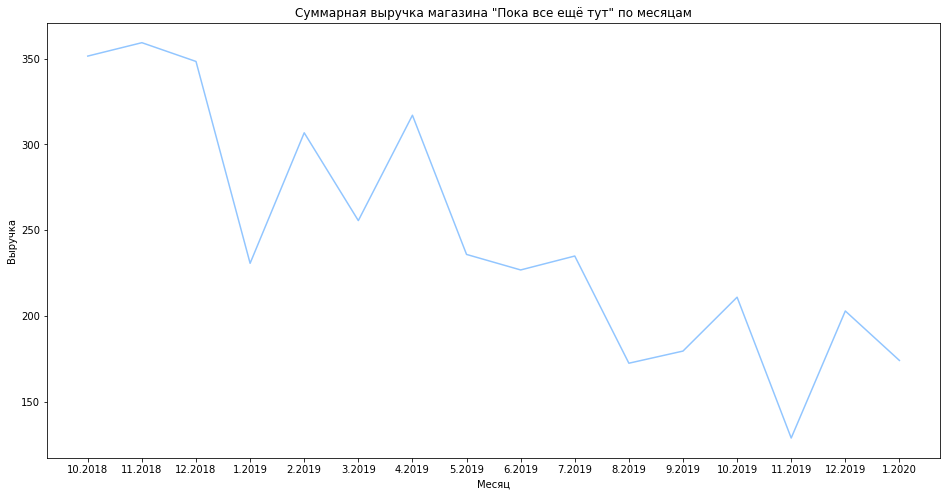

In [90]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=date_pivot_new) 
ax.set_title('Суммарная выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Исключив самый крупный тестовый заказ мы можем наблюдать падение выручки магазина, наблюдается резкий относительный рост (по отношению к предыдущему и следующему месяцу) в апреле, октябре и декабре 2019 года.

Теперь посмотрим выручку по дням недели

In [91]:
weekday_pivot = pd.pivot_table(ecom,
                              index='date_weekday',
                              values='amount',
                              aggfunc='sum').reset_index()

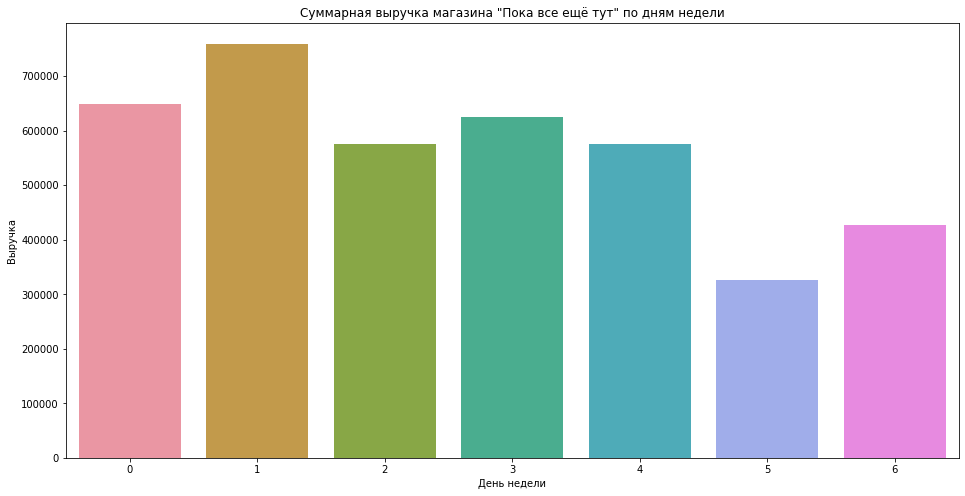

In [92]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='date_weekday', y='amount', data=weekday_pivot) 
ax.set_title('Суммарная выручка магазина "Пока все ещё тут" по дням недели')
ax.set_xlabel('День недели')
ax.set_ylabel('Выручка')
plt.show();

Больше всего суммарно магазин заработал за вторники, меньше всего за субботы. Выручка выше в будние дни, возможно это связано с оптовыми клиентами, которые чаще покупают в будние дни.

### Средний чек

Разделим данные по заказам и определим, какой средний чек у покупателей, совершающих заказы. Также посмотрим, зависит ли средний чек от дня недели и месяца покупки. Некоторые заказы формировались в течении нескольких дней/месяцев, будем считать по товарам в заказе, которые были добавлены в этот момент.

Для начала определим общий средний чек по всем заказам.

In [93]:
avg_check = pd.pivot_table(ecom,
                           index='order_id',
                           values='amount',
                           aggfunc='sum').reset_index()
print('Общий средний чек:', round((avg_check['amount'].sum() / len(avg_check)), 2))

Общий средний чек: 1118.06


In [94]:
avg_check_month = pd.pivot_table(ecom,
                                 index=['date_month','order_id'],
                                 values='amount',
                                 aggfunc='sum').reset_index()
avg_check_month = avg_check_month.groupby('date_month').mean().reset_index()

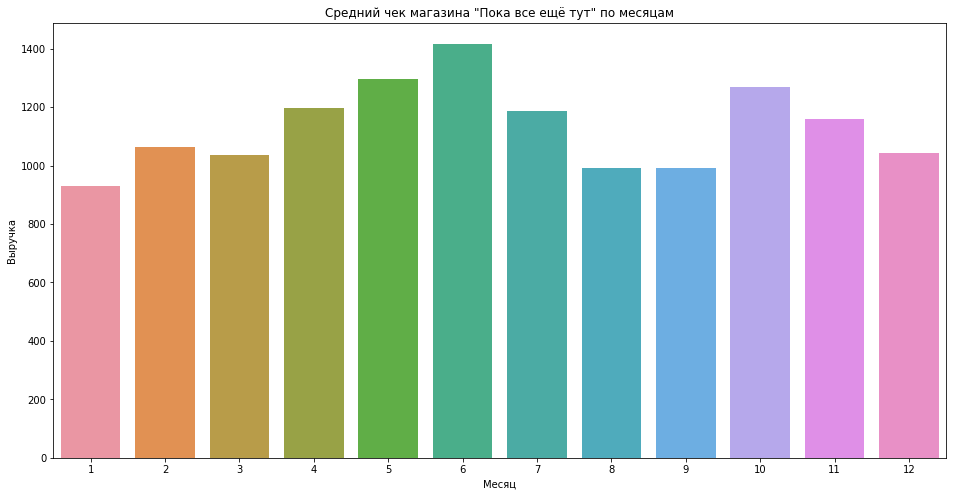

In [95]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='date_month', y='amount', data=avg_check_month) 
ax.set_title('Средний чек магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Самый большой средний чек в июне, мае и октябре, а в январе, августе и сентябре самый низкий. Средний чек в течении года находится между 800 и 1400.

In [96]:
avg_check_weekday = pd.pivot_table(ecom,
                                 index=['date_weekday','order_id'],
                                 values='amount',
                                 aggfunc='sum').reset_index()
avg_check_weekday = avg_check_weekday.groupby('date_weekday').mean().reset_index()

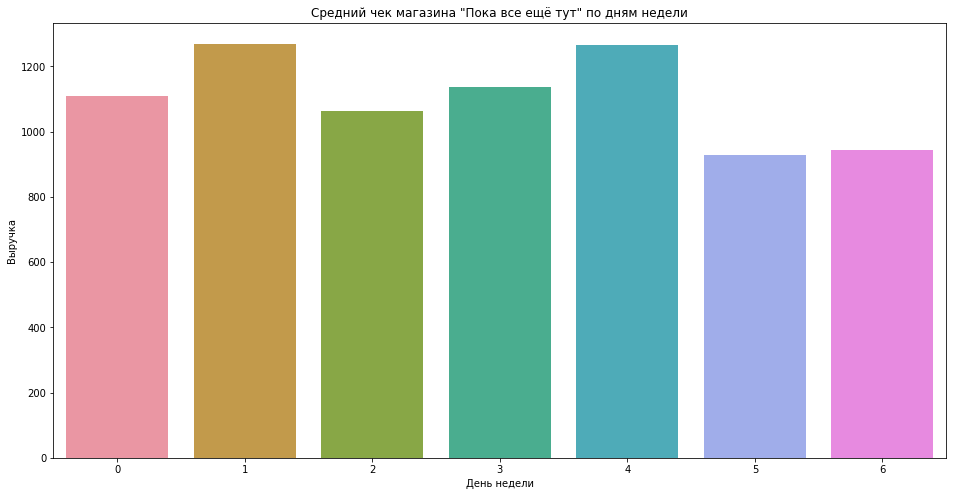

In [97]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='date_weekday', y='amount', data=avg_check_weekday) 
ax.set_title('Средний чек магазина "Пока все ещё тут" по дням недели')
ax.set_xlabel('День недели')
ax.set_ylabel('Выручка')
plt.show();

Средний чек магазина по дням недели в будние дни выше, чем в выходные. Самый высокий средний чек во вторник, самый низкий в субботу.

### Средняя выручка с покупателя

Посмотрим, какой средний показатель выручки по покупателям. Разделим данные по покупателяи и посчитаем сколько в среднем приносит каждый из них.

In [98]:
avg_customer = pd.pivot_table(ecom,
                              index='customer_id',
                              values='amount',
                              aggfunc='sum').reset_index()
print('Средняя выручка с покупателя:', round(avg_customer['amount'].mean(), 2))
print('Количество покупателей:', ecom['customer_id'].nunique())

Средняя выручка с покупателя: 1620.25
Количество покупателей: 2429


In [99]:
print('Медианная выручка с покупателя:', round(avg_customer['amount'].median(), 2))

Медианная выручка с покупателя: 838.0


Так как средняя выручка с покупателя ненамного превышает средний чек, изучим, сколько заказов в среднем совершают покупатели.

### Количество заказов на покупателя

Также посмотрим на распределение, сколько покупателей совершают определённое количество заказов.

In [100]:
customer_order = pd.pivot_table(ecom,
                                index=['customer_id', 'order_id'],
                                values='amount',
                                aggfunc='sum').reset_index()
customer_order = pd.pivot_table(customer_order,
                                index='customer_id',
                                values='order_id',
                                aggfunc='count').reset_index()
print('Среднее количество заказов на покупателя:', round(customer_order['order_id'].mean(), 2))

Среднее количество заказов на покупателя: 1.45


В среднем покупатели совершают более одного заказа.

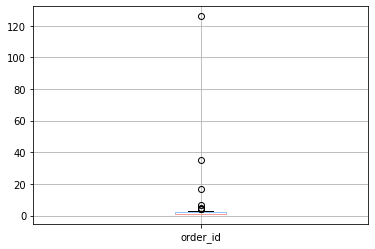

In [101]:
customer_order.boxplot('order_id')
plt.show()

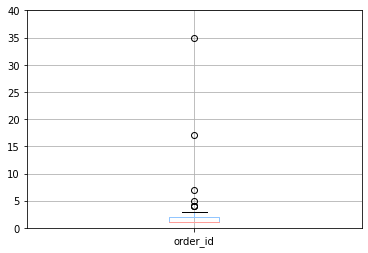

In [102]:
customer_order.boxplot('order_id')
plt.ylim(0, 40)
plt.show()

Выведем Топ-3 покупателя, совершивших большее количество заказов

In [103]:
customer_order.sort_values(by='order_id', ascending=False).head(3)

,customer_id,order_id
1899,c971fb21-d54c-4134-938f-16b62ee86d3b,126
735,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1088,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17


Три самых крупных покупателя совершили 126, 35 и 17 заказов. Посмотрим, какие категории товаров их интересуют больше всего

In [104]:
customer_1 = ecom[ecom['customer_id'] == 'c971fb21-d54c-4134-938f-16b62ee86d3b']
customer_1['categories'].unique()

array(['bathroom', 'storage', 'textile', 'other', 'houseplant', 'decor',
       'cooking_items', 'table_items', 'seedling', 'household_facilities'],
      dtype=object)

Покупатель, который совершил 126 заказа, покупал товары из разных категорий. Посмотрил на сумму его покупок и распределение по категориям.

In [105]:
customer_1 = pd.pivot_table(customer_1,
                           index='categories',
                           values='amount',
                           aggfunc='sum').reset_index()

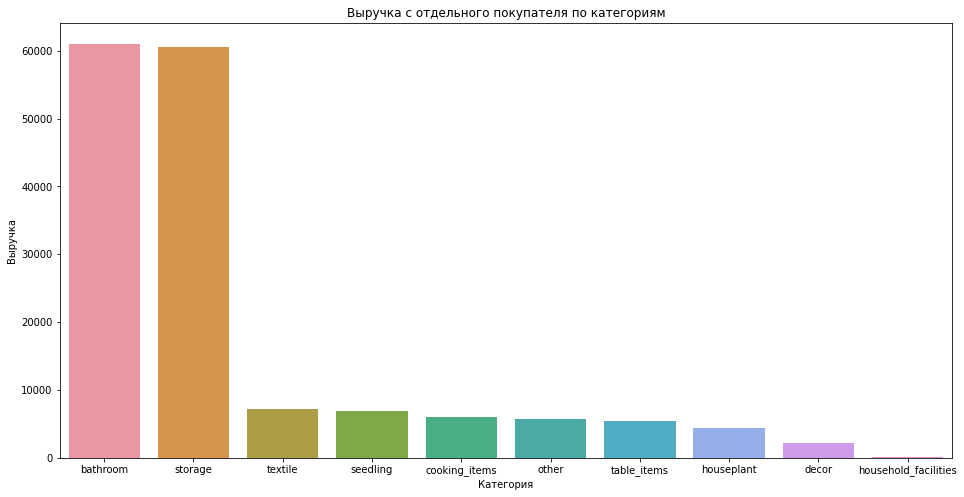

In [106]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='categories', y='amount', data=customer_1.sort_values(by='amount', ascending=False)) 
ax.set_title('Выручка с отдельного покупателя по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Выручка')
plt.show();

На большую сумму данный покупатель приобрёл товаров в категориях организация хранения и товары для ванной. 

In [107]:
customer_1['amount'].sum()

159508.0

Сумма его покупок составляет 159 508.

In [108]:
customer_2 = ecom[ecom['customer_id'] == '4d93d3f6-8b24-403b-a74b-f5173e40d7db']
customer_2['categories'].unique()

array(['bathroom', 'storage', 'table_items', 'cooking_items',
       'houseplant', 'textile', 'other', 'household_facilities', 'decor',
       'seedling'], dtype=object)

Покупатель, совершивший 35 заказов также покупал товары в разных категориях

In [109]:
customer_2 = pd.pivot_table(customer_2,
                           index='categories',
                           values='amount',
                           aggfunc='sum').reset_index()

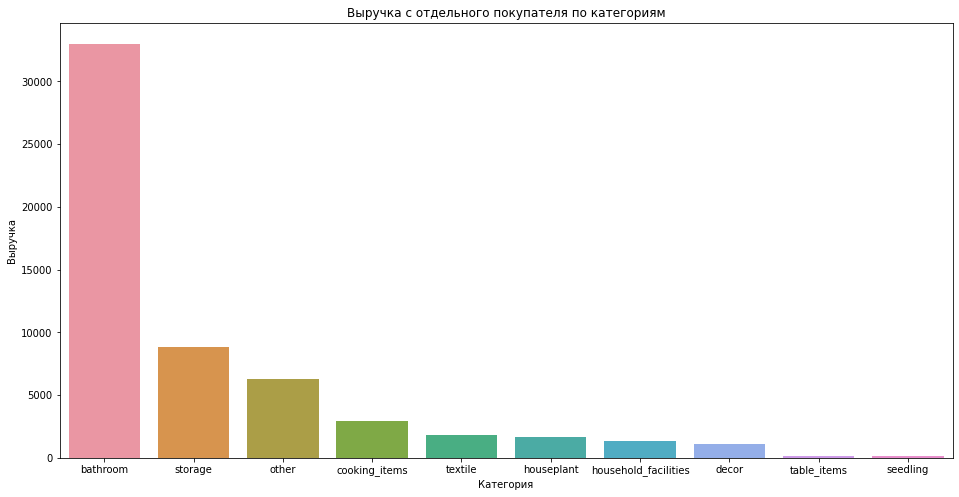

In [110]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='categories', y='amount', data=customer_2.sort_values(by='amount', ascending=False)) 
ax.set_title('Выручка с отдельного покупателя по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Выручка')
plt.show();

Больше всего данный покупатель потратил в категории товаров для ванн. Посмотрим на сумму выручки, которую он принёс магазину.

In [111]:
customer_2['amount'].sum()

57278.0

Покупатель, совершивший 35 заказов приобрёл товаров на сумму 57 278.

In [112]:
customer_3 = ecom[ecom['customer_id'] == '73d1cd35-5e5f-4629-8cf2-3fda829d4e58']
customer_3['categories'].unique()

array(['cooking_items', 'seedling', 'other', 'storage', 'bathroom'],
      dtype=object)

Покупатель, который совершил 17 заказов - также приобретал товары в разных категориях, посмотрим на распределение выручки между категориями.

In [113]:
customer_3 = pd.pivot_table(customer_3,
                           index='categories',
                           values='amount',
                           aggfunc='sum').reset_index()

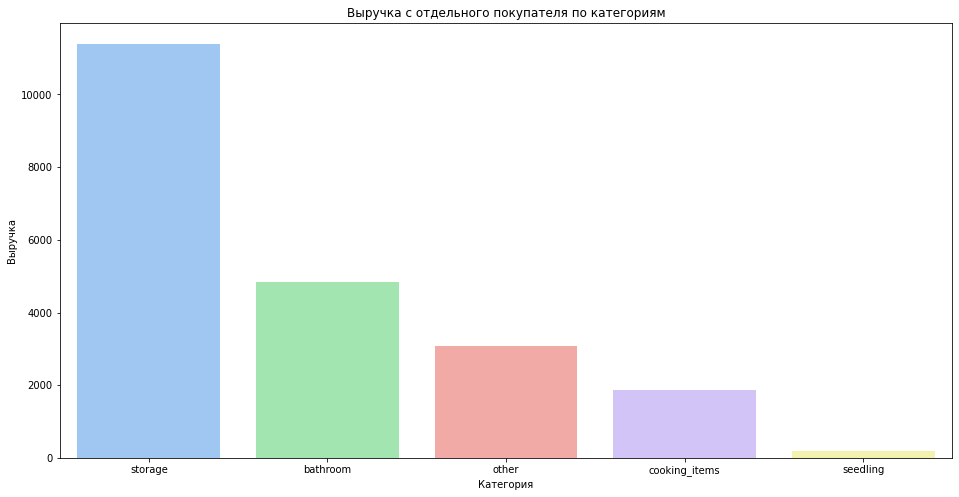

In [114]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='categories', y='amount', data=customer_3.sort_values(by='amount', ascending=False)) 
ax.set_title('Выручка с отдельного покупателя по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Выручка')
plt.show();

Большую сумму данный покупатель потратил в категории товаров для оганизации хранения.

In [115]:
customer_3['amount'].sum()

21361.0

Третий покупатель совершил 17 заказов и потратил в магазине 21 361.

### Сезонность товаров

Изучим какие группы товаров и в какой период пользуются большей популярностью.

Для начала изучим в целом каждую долю товаров по количеству и по выручке.

In [116]:
categories_amount = pd.pivot_table(ecom,
                                   index='categories',
                                   values='amount',
                                  aggfunc='sum').reset_index()
categories_amount['amount'] = round((categories_amount['amount'] / 1000), 2)

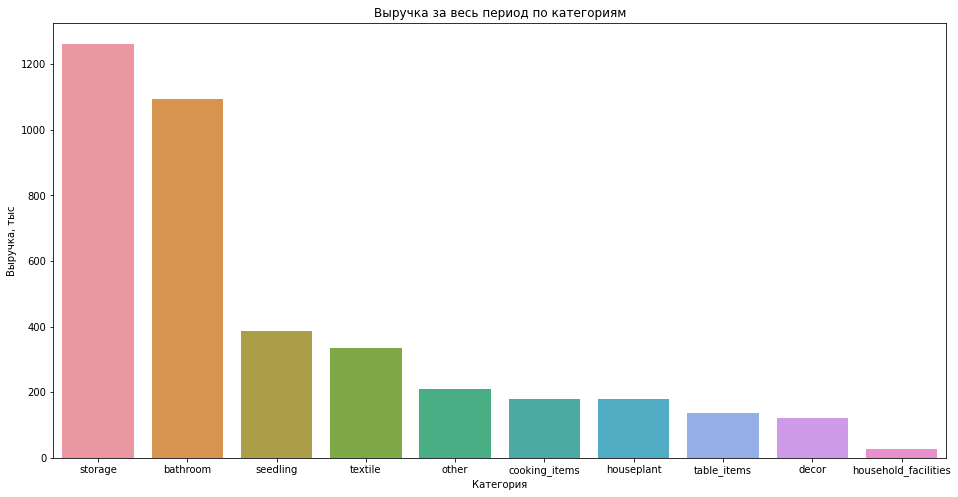

In [117]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='categories', y='amount', data=categories_amount.sort_values(by='amount', ascending=False)) 
ax.set_title('Выручка за весь период по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Выручка, тыс')
plt.show();

За весь исследуемы период, больше всего выручки принесла категория организации хранения (1,36 млн) и категория товаров для ванн (1,19 млн). Меньше всего хозяйственные средства (30 090).

Посмотрим на продажи категорий по количеству проданных товаров.

In [118]:
categories_quantity = pd.pivot_table(ecom,
                                   index='categories',
                                   values='quantity',
                                  aggfunc='sum').reset_index()

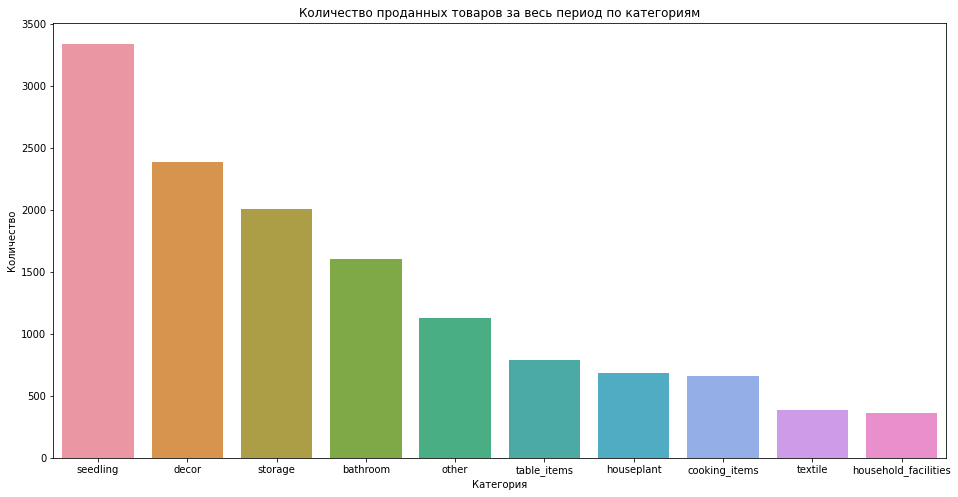

In [119]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='categories', y='quantity', data=categories_quantity.sort_values(by='quantity', ascending=False)) 
ax.set_title('Количество проданных товаров за весь период по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Количество')
plt.show();

По количеству проданных товаров лидируют рассада и семена (3 661 шт), а также товары для декора (2 462 шт) и товары для организации хранения (2 112 шт). Меньше всего проданных товаров в категории хозяйственных средств (418 шт).

Теперь посмотрим по месяцам выручку каждой из категорий.

**Рассада и семена**

In [120]:
seedling = ecom[ecom['categories'] == 'seedling']

In [121]:
seedling_pivot = pd.pivot_table(seedling,
                                index=['date_year','date_month'],
                                values='amount',
                                aggfunc='sum').reset_index()
seedling_pivot['date_year'] = seedling_pivot['date_year'].astype('str')
seedling_pivot['date_month'] = seedling_pivot['date_month'].astype('str')
seedling_pivot['date'] = seedling_pivot['date_month'] + '.' + seedling_pivot['date_year']
seedling_pivot = seedling_pivot[['date', 'amount']]

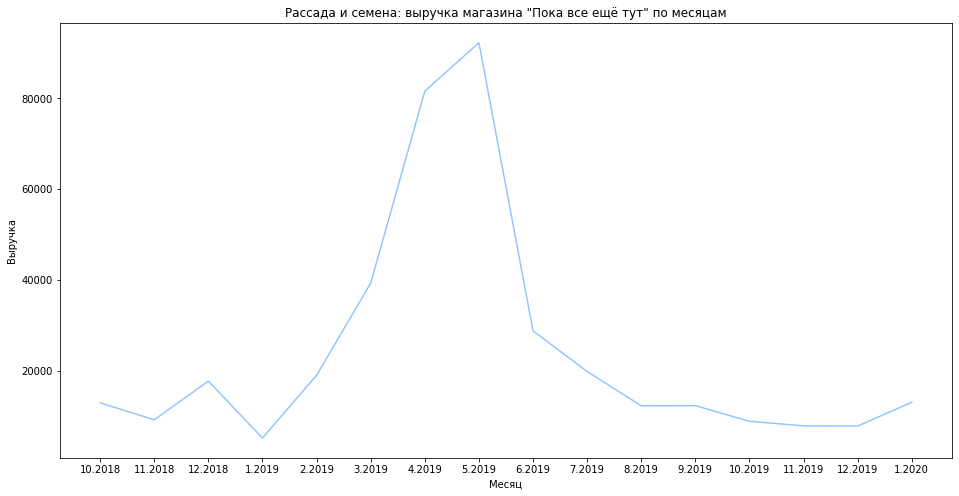

In [122]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=seedling_pivot) 
ax.set_title('Рассада и семена: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Рост продаж в данной категории начинается с февраля, пик продаж в данной категории - апрель и май. После июля продажи сильно снижаются.

**Декор**

In [123]:
decor = ecom[ecom['categories'] == 'decor']

In [124]:
decor_pivot = pd.pivot_table(decor,
                             index=['date_year','date_month'],
                             values='amount',
                             aggfunc='sum').reset_index()
decor_pivot['date_year'] = decor_pivot['date_year'].astype('str')
decor_pivot['date_month'] = decor_pivot['date_month'].astype('str')
decor_pivot['date'] = decor_pivot['date_month'] + '.' + decor_pivot['date_year']
decor_pivot = decor_pivot[['date', 'amount']]

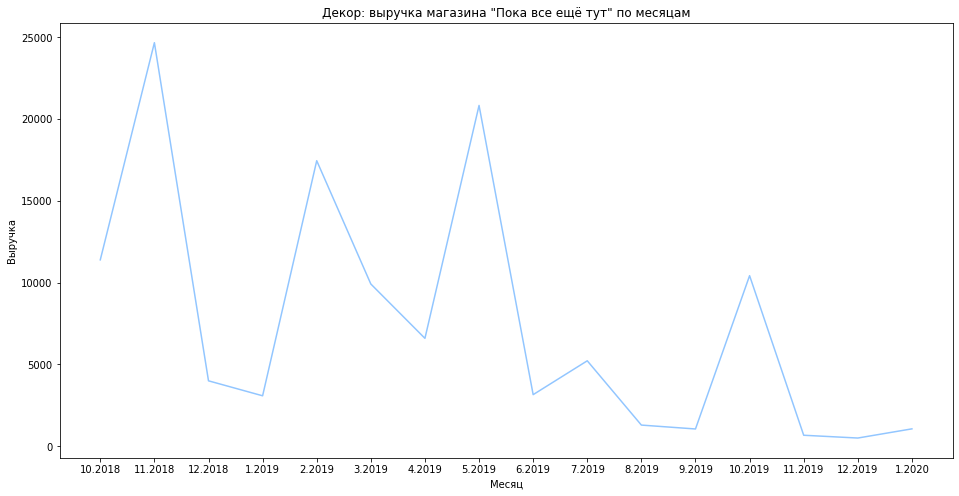

In [125]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=decor_pivot) 
ax.set_title('Декор: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

В 2018 году пик продаж в категории декор пришёлся на ноябрь, в 2019 году на май, февраль и октябрь. Возможно это связано с праздничными датами, к которым часто украшаются дома - майские праздники и хэллоуин. Меньше всего продаж в декабре и январе, сентябре и летних месяцах. Возможно людям не хватает новогодних украшений в ассортименте и предметов декора на летний период.

**Организация хранения**

In [126]:
storage = ecom[ecom['categories'] == 'storage']

In [127]:
storage_pivot = pd.pivot_table(storage,
                             index=['date_year','date_month'],
                             values='amount',
                             aggfunc='sum').reset_index()
storage_pivot['date_year'] = storage_pivot['date_year'].astype('str')
storage_pivot['date_month'] = storage_pivot['date_month'].astype('str')
storage_pivot['date'] = storage_pivot['date_month'] + '.' + storage_pivot['date_year']
storage_pivot = storage_pivot[['date', 'amount']]

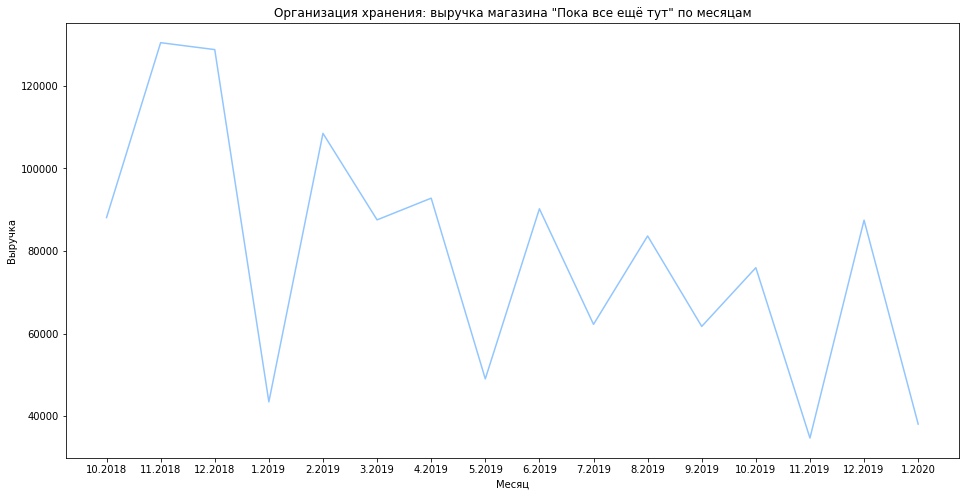

In [128]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=storage_pivot) 
ax.set_title('Организация хранения: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Больше всего продаж в категории организации  хранения было совершено в декабре 2018 года, выручка в данной категории то снижается, то повышается.

**Товары для ванной комнаты и уборки**

In [129]:
bathroom = ecom[ecom['categories'] == 'bathroom']

In [130]:
bathroom_pivot = pd.pivot_table(bathroom,
                                index=['date_year','date_month'],
                                values='amount',
                                aggfunc='sum').reset_index()
bathroom_pivot['date_year'] = bathroom_pivot['date_year'].astype('str')
bathroom_pivot['date_month'] = bathroom_pivot['date_month'].astype('str')
bathroom_pivot['date'] = bathroom_pivot['date_month'] + '.' + bathroom_pivot['date_year']
bathroom_pivot = bathroom_pivot[['date', 'amount']]

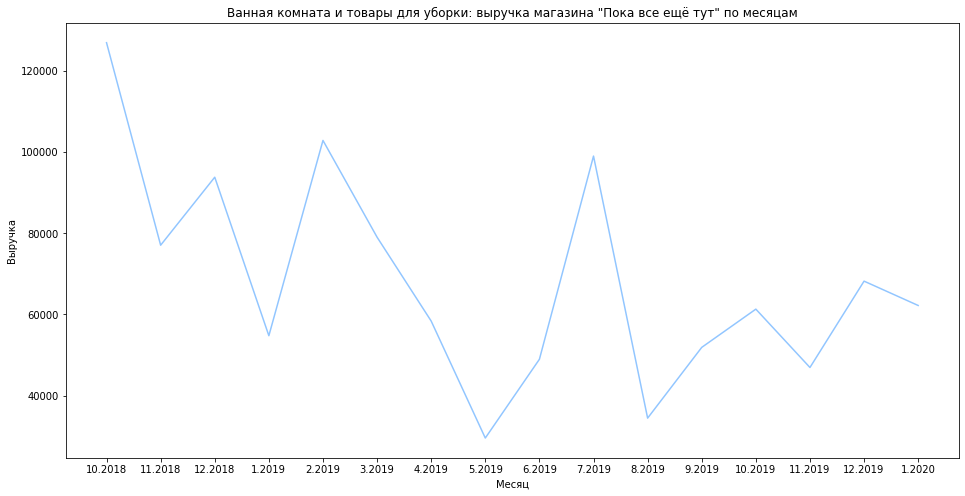

In [131]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=bathroom_pivot) 
ax.set_title('Ванная комната и товары для уборки: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Пик продаж в данной категории пришёлся на октябрь 2018 года. Также относительно большая выручка была получена в феврале, марте и июле 2019 г. 

**Столовые принадлежности**

In [132]:
table_items = ecom[ecom['categories'] == 'table_items']

In [133]:
table_items_pivot = pd.pivot_table(table_items,
                                   index=['date_year','date_month'],
                                   values='amount',
                                   aggfunc='sum').reset_index()
table_items_pivot['date_year'] = table_items_pivot['date_year'].astype('str')
table_items_pivot['date_month'] = table_items_pivot['date_month'].astype('str')
table_items_pivot['date'] = table_items_pivot['date_month'] + '.' + table_items_pivot['date_year']
table_items_pivot = table_items_pivot[['date', 'amount']]

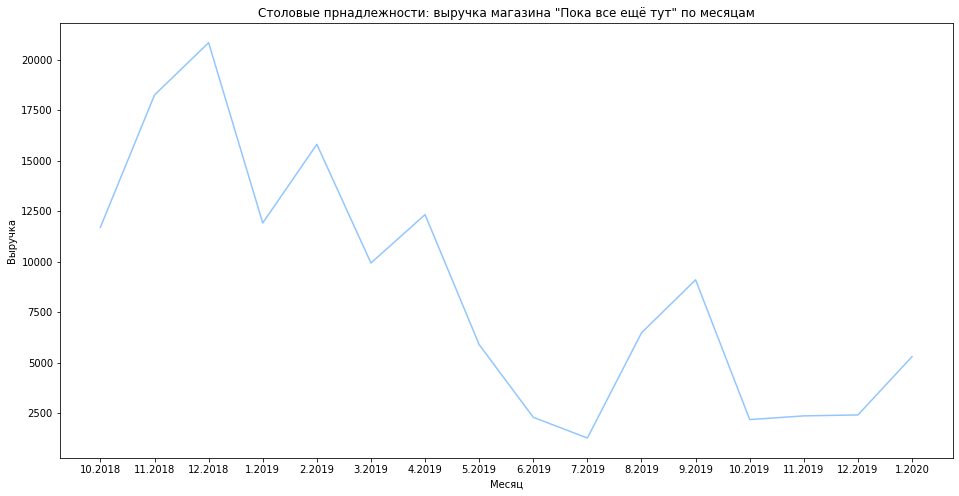

In [134]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=table_items_pivot) 
ax.set_title('Столовые прнадлежности: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Больше всего выручка от столовых приборов была в декабре 2018 года (возможно в придверии Нового года), в аналогичном периоде в 2019 года роста не наблюдается), в 2019 году выше всего продажи в феврале, апреле и сентябре.

**Товары для приготовления**

In [135]:
cooking_items = ecom[ecom['categories'] == 'cooking_items']

In [136]:
cooking_items_pivot = pd.pivot_table(cooking_items,
                                     index=['date_year','date_month'],
                                     values='amount',
                                     aggfunc='sum').reset_index()
cooking_items_pivot['date_year'] = cooking_items_pivot['date_year'].astype('str')
cooking_items_pivot['date_month'] = cooking_items_pivot['date_month'].astype('str')
cooking_items_pivot['date'] = cooking_items_pivot['date_month'] + '.' + cooking_items_pivot['date_year']
cooking_items_pivot = cooking_items_pivot[['date', 'amount']]

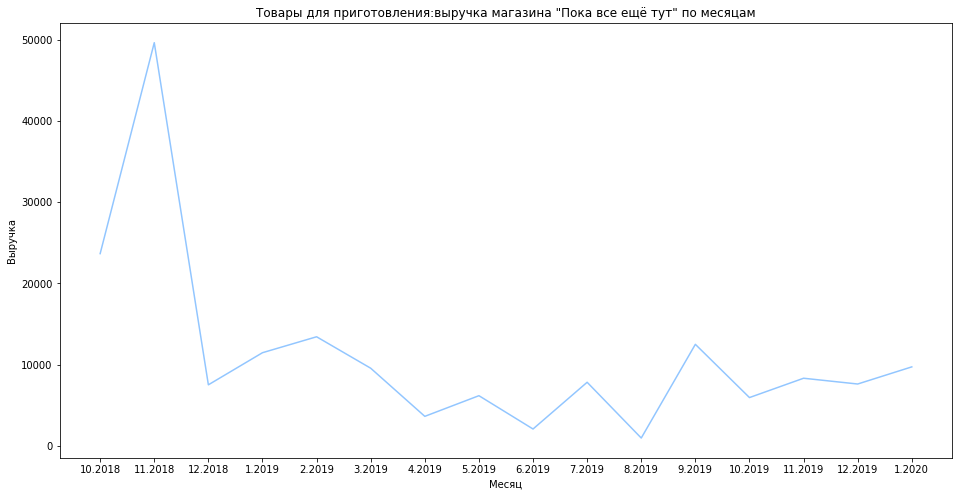

In [137]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=cooking_items_pivot) 
ax.set_title('Товары для приготовления:выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

В ноябре 2018 года наблюдается пик продаж в данной категории (в ноябре 2019 года роста нет).

**Комнатные растения**

In [138]:
houseplant = ecom[ecom['categories'] == 'houseplant']

In [139]:
houseplant_pivot = pd.pivot_table(houseplant,
                             index=['date_year','date_month'],
                             values='amount',
                             aggfunc='sum').reset_index()
houseplant_pivot['date_year'] = houseplant_pivot['date_year'].astype('str')
houseplant_pivot['date_month'] = houseplant_pivot['date_month'].astype('str')
houseplant_pivot['date'] = houseplant_pivot['date_month'] + '.' + houseplant_pivot['date_year']
houseplant_pivot = houseplant_pivot[['date', 'amount']]

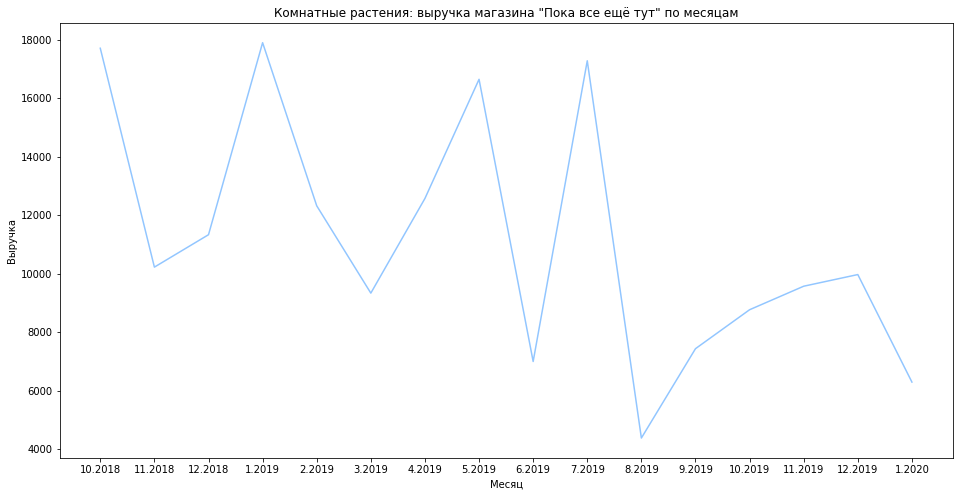

In [140]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=houseplant_pivot) 
ax.set_title('Комнатные растения: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Самая высокая выручка в категории комнатных растений наблюдается в октябре 2018 года и в январе и июле 2019 года, в остальне время объём продаж то увеличивается, то снижается.

**Текстиль**

In [141]:
textile = ecom[ecom['categories'] == 'textile']

In [142]:
textile_pivot = pd.pivot_table(textile,
                               index=['date_year','date_month'],
                               values='amount',
                               aggfunc='sum').reset_index()
textile_pivot['date_year'] = textile_pivot['date_year'].astype('str')
textile_pivot['date_month'] = textile_pivot['date_month'].astype('str')
textile_pivot['date'] = textile_pivot['date_month'] + '.' + textile_pivot['date_year']
textile_pivot = textile_pivot[['date', 'amount']]

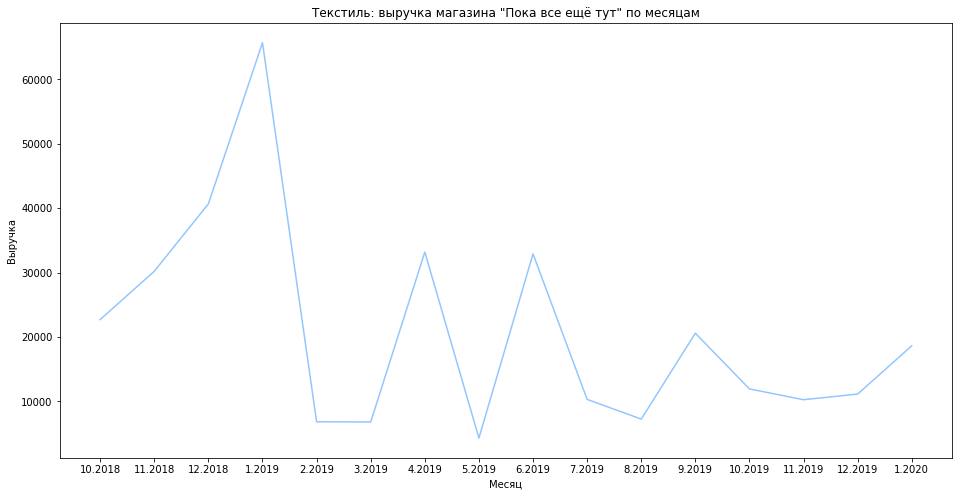

In [143]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=textile_pivot) 
ax.set_title('Текстиль: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Выручка от продаж текстиля выше всего в январе 2019 года, также есть относительные пики в апреле и июне 2019 года.

**Хозяйственные средства**

In [144]:
household_facilities = ecom[ecom['categories'] == 'household_facilities']

In [145]:
household_facilities_pivot = pd.pivot_table(household_facilities,
                                            index=['date_year','date_month'],
                                            values='amount',
                                            aggfunc='sum').reset_index()
household_facilities_pivot['date_year'] = household_facilities_pivot['date_year'].astype('str')
household_facilities_pivot['date_month'] = household_facilities_pivot['date_month'].astype('str')
household_facilities_pivot['date'] = household_facilities_pivot['date_month'] + '.' + household_facilities_pivot['date_year']
household_facilities_pivot = household_facilities_pivot[['date', 'amount']]

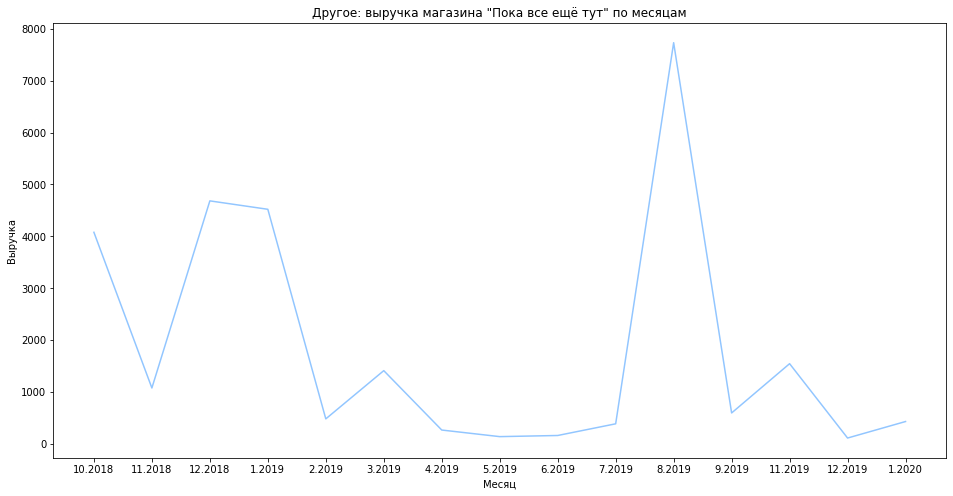

In [146]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=household_facilities_pivot) 
ax.set_title('Другое: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

Хозяйственные средства большую выручку принесли в августе 2019 года.

**Другое**

In [147]:
other = ecom[ecom['categories'] == 'other']

In [148]:
other_pivot = pd.pivot_table(other,
                             index=['date_year','date_month'],
                             values='amount',
                             aggfunc='sum').reset_index()
other_pivot['date_year'] = other_pivot['date_year'].astype('str')
other_pivot['date_month'] = other_pivot['date_month'].astype('str')
other_pivot['date'] = other_pivot['date_month'] + '.' + other_pivot['date_year']
other_pivot = other_pivot[['date', 'amount']]

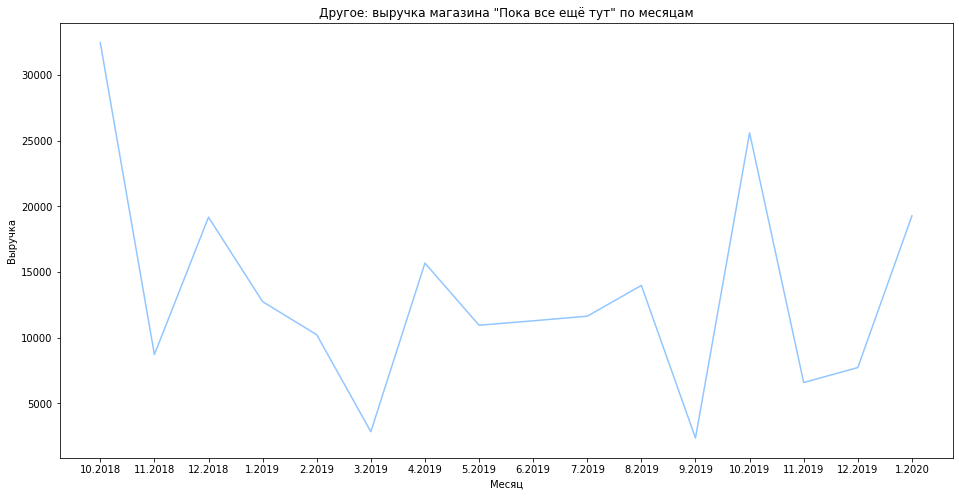

In [149]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='amount', data=other_pivot) 
ax.set_title('Другое: выручка магазина "Пока все ещё тут" по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show();

В категории другое яркий пик в октябре 2018 года, также относительно высокие продажи в октябре 2019 года.

По объёму выручки среди товарных категорий лидируют товары для организации хранения и товары для ванных комнат, по количетсу проданных товаров лидируют рассада и семена, и товары для декора. Однозначно сезонным товаром можно назвать рассаду и семена, все остальные категории продаются в большем и меньшем объёме, но об однозначной зависимости сказать нельзя, так как рост объёма продаж наблюдается в разные временные промежутки.

In [150]:
customer_dynamics = pd.pivot_table(ecom,
                                   index=['date_year','date_month', 'customer_id'],
                                   values='amount',
                                   aggfunc='sum').reset_index()
customer_dynamics = pd.pivot_table(customer_dynamics,
                                   index=['date_year','date_month'],
                                   values='customer_id',
                                   aggfunc='count').reset_index()
customer_dynamics['date_year'] = customer_dynamics['date_year'].astype('str')
customer_dynamics['date_month'] = customer_dynamics['date_month'].astype('str')
customer_dynamics['date'] = customer_dynamics['date_month'] + '.' + customer_dynamics['date_year']
customer_dynamics = customer_dynamics[['date', 'customer_id']]

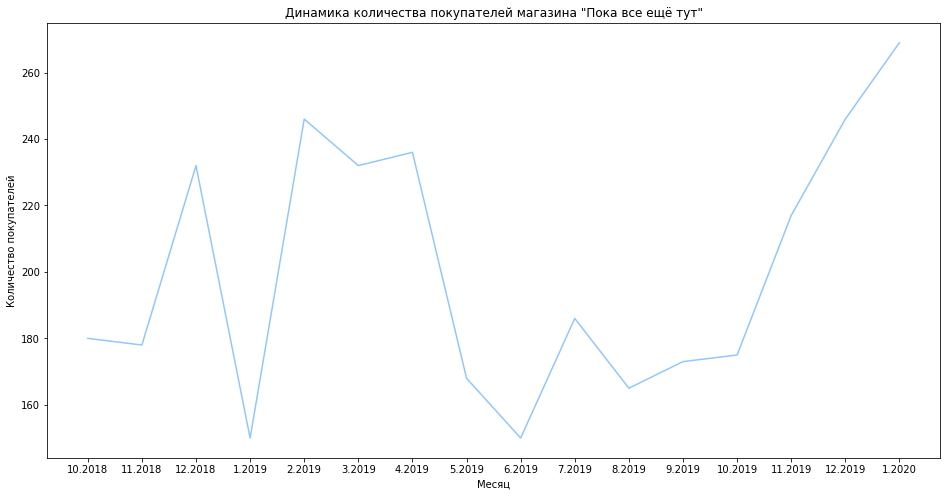

In [151]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='customer_id', data=customer_dynamics) 
ax.set_title('Динамика количества покупателей магазина "Пока все ещё тут"')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество покупателей')
plt.show();

Количество покупателей наало свой рост с оутября 2019 года, достигнув пика в январе 2020 года. Также количество покупателей относительно высокое в декабре 2018 года и с февраля по апрель 2019 года.

In [152]:
orders_dynamics = pd.pivot_table(ecom,
                                 index=['date_year','date_month', 'order_id'],
                                 values='amount',
                                 aggfunc='sum').reset_index()
orders_dynamics = pd.pivot_table(orders_dynamics,
                                 index=['date_year','date_month'],
                                 values='order_id',
                                 aggfunc='count').reset_index()
orders_dynamics['date_year'] = orders_dynamics['date_year'].astype('str')
orders_dynamics['date_month'] = orders_dynamics['date_month'].astype('str')
orders_dynamics['date'] = orders_dynamics['date_month'] + '.' + orders_dynamics['date_year']
orders_dynamics = orders_dynamics[['date', 'order_id']]

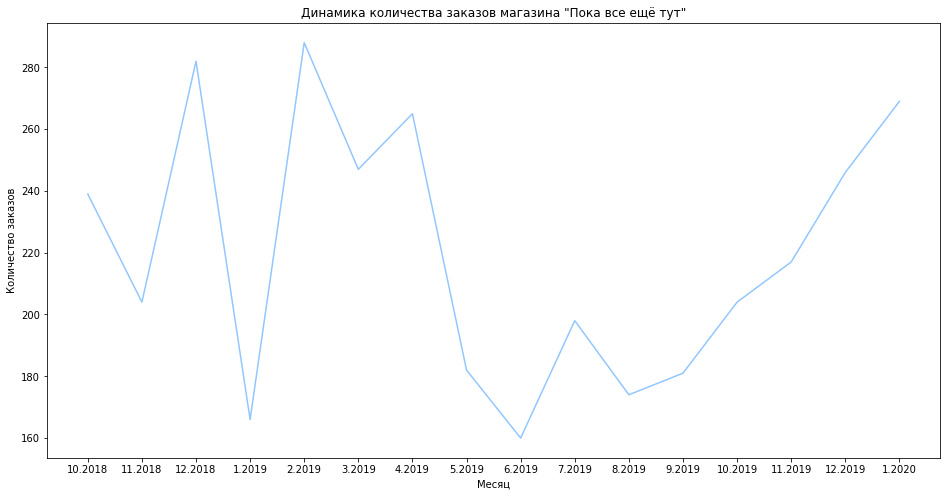

In [153]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='date', y='order_id', data=orders_dynamics) 
ax.set_title('Динамика количества заказов магазина "Пока все ещё тут"')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество заказов')
plt.show();

Самое низкое количество заказов наблюдается в январе и июне 2019 года, самое большое количество заказов в феврале 2019 года. С августа 2019 года наблюдается рост количества заказов.

## Сегментация покупателей

### По выручке с покупателя


Разделить покупателей на группы по выручке, которую приносят покупатели.

In [154]:
customer_amount = pd.pivot_table(ecom,
                                index='customer_id',
                                values='amount',
                                aggfunc='sum').reset_index()
print('Всего покупателей:', len(customer_amount))
print('Средняя выручка с одного покупателя:', round(customer_amount['amount'].mean(), 2))

Всего покупателей: 2429
Средняя выручка с одного покупателя: 1620.25


In [155]:
customer_amount.describe()

,amount
count,2429.000000
mean,1620.248834
std,4327.180308
min,15.000000
25%,389.000000
50%,838.000000
75%,1798.000000
max,159508.000000


75% процентов покупателей приносят компании до 2000. Разделим покупателей на 5 равныx групп - очень низкая выручка, низкая выручка, средняя выручка, высокая выручка, очень высокая выручка. Каждая из групп будет содержать в себе по 20% пользователей.

In [156]:
pd.qcut(customer_amount['amount'], 5)

0           (300.0, 638.4]
1           (300.0, 638.4]
2          (638.4, 1087.0]
3         (1087.0, 2103.0]
4       (2103.0, 159508.0]
               ...        
2424      (1087.0, 2103.0]
2425        (300.0, 638.4]
2426        (300.0, 638.4]
2427       (638.4, 1087.0]
2428        (300.0, 638.4]
Name: amount, Length: 2429, dtype: category
Categories (5, interval[float64]): [(14.999, 300.0] < (300.0, 638.4] < (638.4, 1087.0] < (1087.0, 2103.0] < (2103.0, 159508.0]]

- Очень низкая выручка: до 327 за покупателя.
- Низкая выручка: от 328 до 680 за покупателя.
- Средняя выручка: от 681 до 1160 за покупателя.
- Высокая выручка: от 1161 до 2323 за покупателя.
- Очень высокая выручка: от 2324.

In [157]:
def categorize_purpose(row):
    try:
        if row <= 327:
            return 'Очень низкая выручка'
        elif 328 <= row <= 680:
            return 'Низкая выручка'
        elif 681 <= row <= 1160:
            return 'Средняя выручка'
        elif 1161 <= row <= 2323:
            return 'Высокая выручка'
        elif 2324 <= row:
            return 'Очень высокая выручка'
    except:
        return 'нет категории'

In [158]:
customer_amount['seg_amount'] = customer_amount['amount'].apply(categorize_purpose)

Создадим копию основного датафрейма и добавим сегментацию пользователей.

In [159]:
df_customer_amount = ecom
df_customer_amount = df_customer_amount.merge(customer_amount[['customer_id', 'seg_amount']], how='left', on='customer_id')

Посмотрим, сколько товаров приобрела каждая из групп.

In [160]:
df_customer_amount_pivot = pd.pivot_table(df_customer_amount,
                                         index='seg_amount',
                                         values='quantity',
                                         aggfunc='count').reset_index()

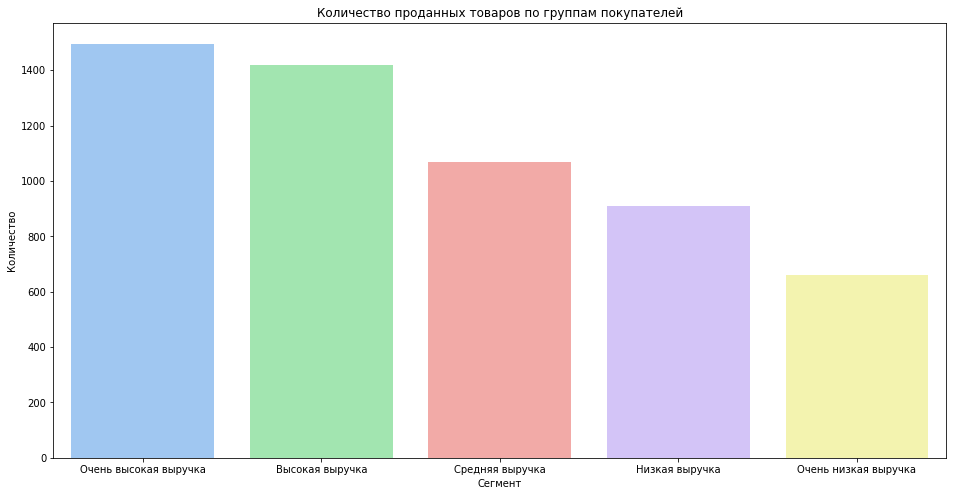

In [161]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='seg_amount', y='quantity', data=df_customer_amount_pivot.sort_values(by='quantity', ascending=False)) 
ax.set_title('Количество проданных товаров по группам покупателей')
ax.set_xlabel('Сегмент')
ax.set_ylabel('Количество')
plt.show();

Вывод логичный - покупатели из категории приносящей больше всего выручки - покупают больше товаров. 

Для сегментации использовать данный метод не будем использовать, так как в группе очень высокой выручки большой разрыв между группами заказов.

### По количеству заказов на покупателя

Разделить покупателей на группы по количеству заказов, которые они совершают.

In [162]:
customer_count_order = pd.pivot_table(ecom,
                                      index=['customer_id', 'order_id'],
                                      values='amount',
                                      aggfunc='sum').reset_index()
customer_count_order = pd.pivot_table(customer_count_order,
                                      index='customer_id',
                                      values='order_id',
                                      aggfunc='count').reset_index()
print('Всего покупателей:', len(customer_count_order))
print('Количество заказов:', customer_count_order['order_id'].sum())
print('Среднее количество заказов на покупателя:', round(customer_count_order['order_id'].mean(), 2))

Всего покупателей: 2429
Количество заказов: 3520
Среднее количество заказов на покупателя: 1.45


Проверим совпадает ли количество уникальных заказов

In [163]:
ecom['order_id'].nunique()

3520

In [164]:
customer_count_order.describe()

,order_id
count,2429.000000
mean,1.449156
std,2.689519
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,126.000000


Разделить покуателей на равные группы мы не сможем, так как больше половины покупателей совершают только один заказ.
Разделим покупателей на тех кто совершают 1 заказ, от 2 до 10 заказов, от 10 до 40 заказов и тех, кто оформил более 40 заказов.
Так как группы неравномерные - рассмотрим какие категории товаров преобладают в каждой из них по выручке.

In [165]:
def categorize_purpose(row):
    try:
        if row == 1:
            return 'Не совершал повторных покупок'
        elif 2 <= row <= 10:
            return 'Совершил от 2 до 10 заказов'
        elif 10 < row <= 40:
            return 'Совершил от 11 до 40 заказов'
        elif 40 < row:
            return 'Совершил более 40 заказов'
    except:
        return 'нет категории'

In [166]:
customer_count_order['seg_orders'] = customer_count_order['order_id'].apply(categorize_purpose)

Посмотрим, сколько покупателей в каждой из групп

In [167]:
customer_count_order.groupby('seg_orders')['customer_id'].count().sort_values(ascending=False)

seg_orders
Не совершал повторных покупок    1544
Совершил от 2 до 10 заказов       882
Совершил от 11 до 40 заказов        2
Совершил более 40 заказов           1
Name: customer_id, dtype: int64

63,2% покупателей не совершали повторные покупки

Создадим копию исходного датафрейма и сегментируем пользователей по количеству заказов

In [168]:
df_customer_count_order = ecom
df_customer_count_order = df_customer_count_order.merge(customer_count_order[['customer_id', 'seg_orders']], 
                                                        how='left', 
                                                        on='customer_id')

In [169]:
orders_categories = pd.pivot_table(df_customer_count_order,
                                  index='seg_orders',
                                  columns='categories',
                                  values='amount',
                                  aggfunc='sum').reset_index()
orders_categories

categories,seg_orders,bathroom,cooking_items,decor,household_facilities,houseplant,other,seedling,storage,table_items,textile
0,Не совершал повторных покупок,444092.000000,103185.0,106006.000000,22278.0,115514.0,88544.000000,270680.000000,658662.00,86496.0,130318.0
1,Совершил более 40 заказов,61031.000000,5970.0,2142.000000,82.0,4411.0,5762.000000,6861.000000,60509.00,5495.0,7245.0
2,Совершил от 11 до 40 заказов,37857.000000,4815.0,1120.000000,1350.0,1674.0,9344.000000,299.000000,20195.00,187.0,1798.0
3,Совершил от 2 до 10 заказов,552281.666667,66242.5,12061.333333,3935.0,57096.5,107547.333333,109527.833333,523002.25,45878.5,194089.5


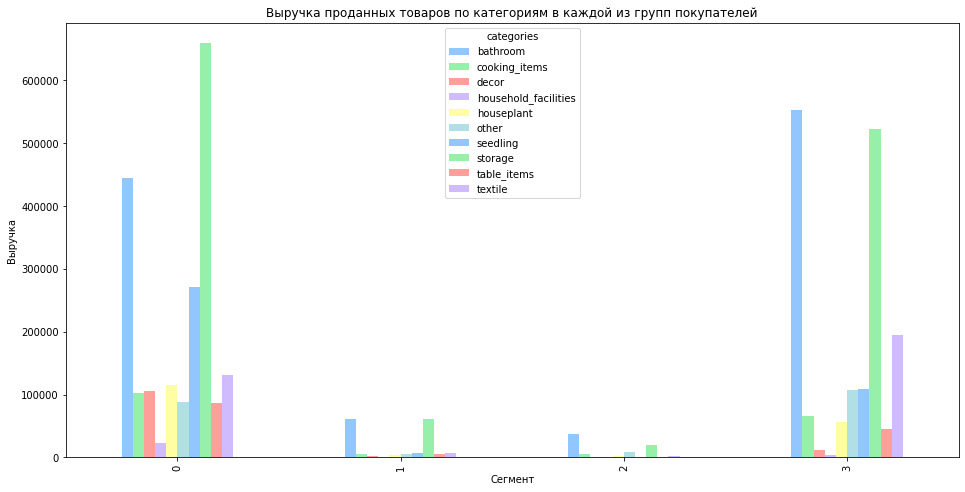

In [170]:
orders_categories.plot(kind='bar', figsize=(16, 8))
plt.title('Выручка проданных товаров по категориям в каждой из групп покупателей')
plt.xlabel('Сегмент')
plt.ylabel('Выручка')
plt.show();

В каждой из сегментов покупателей лидерами продаж являются категории товаров для ванных комнат и организации хранения. Любопытно что выручка с продажи текстиля больше в группе покупателей, которые совершали больше одного заказа и меньше 10. А также в сегментах покупателей, которые совершили более 10 заказов почти отсутствуют растения, как комнатные, так и растения для посадки, общая сумма в этих двух сегментам по двум категориям - 13 245 (0,24% от всего объёма выручки).

Посмотрим, какой средний чек у каждого из сегментов покупателей.

In [171]:
avg_check_seg = pd.pivot_table(df_customer_count_order,
                              index=['seg_orders', 'order_id'],
                              values='amount',
                              aggfunc='sum').reset_index()

avg_check_seg = avg_check_seg.groupby('seg_orders').agg({'amount': 'mean'}).reset_index()
avg_check_seg

,seg_orders,amount
0,Не совершал повторных покупок,1312.030440
1,Совершил более 40 заказов,1265.936508
2,Совершил от 11 до 40 заказов,1512.288462
3,Совершил от 2 до 10 заказов,929.734381


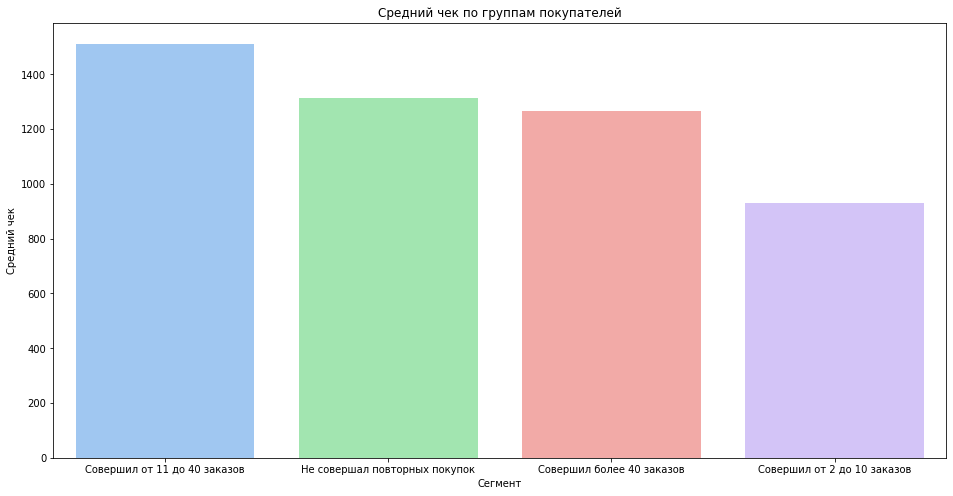

In [172]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='seg_orders', y='amount', data=avg_check_seg.sort_values(by='amount', ascending=False)) 
ax.set_title('Средний чек по группам покупателей')
ax.set_xlabel('Сегмент')
ax.set_ylabel('Средний чек')
plt.show();

Средний чек покупателей, которые сделали от 11 до 40 заказов - выше, чем у других сегментов. У покупателей, совершивших от 2 до 10 заказов средний чек ниже всего.

Данную сегментацию не можем использовать, так как 63,2% покупателей не совершали повторные покупки, а в группах совершивших от 11 до 40 заказов и более 40 заказов - всего 3 покупателя.

### По сезонности покупок

Разделить покупателей на группы по месяцам, в которые совершатся покупки.

In [173]:
customer_month = pd.pivot_table(ecom,
                                index='customer_id',
                                columns='date_month',
                                values='quantity',
                                aggfunc='sum').reset_index()
customer_month['sum'] = customer_month.sum(axis=1)
customer_month[1] = round(customer_month[1] * 100 / customer_month['sum'], 2)
customer_month[2] = round(customer_month[2] * 100 / customer_month['sum'], 2)
customer_month[3] = round(customer_month[3] * 100 / customer_month['sum'], 2)
customer_month[4] = round(customer_month[4] * 100 / customer_month['sum'], 2)
customer_month[5] = round(customer_month[5] * 100 / customer_month['sum'], 2)
customer_month[6] = round(customer_month[6] * 100 / customer_month['sum'], 2)
customer_month[7] = round(customer_month[7] * 100 / customer_month['sum'], 2)
customer_month[8] = round(customer_month[8] * 100 / customer_month['sum'], 2)
customer_month[9] = round(customer_month[9] * 100 / customer_month['sum'], 2)
customer_month[10] = round(customer_month[10] * 100 / customer_month['sum'], 2)
customer_month[11] = round(customer_month[11] * 100 / customer_month['sum'], 2)
customer_month[12] = round(customer_month[12] * 100 / customer_month['sum'], 2)

customer_month.head(15)

date_month,customer_id,1,2,3,4,5,6,7,8,9,10,11,12,sum
0,000d6849-084e-4d9f-ac03-37174eaf60c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,4.0
1,001cee7f-0b29-4716-b202-0042213ab038,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,2.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,2.0
5,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
6,005ba170-45e8-42de-93f7-192481ae2659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,66.67,NaN,3.0
7,00bd74b1-2792-47db-a2f1-680a09ac5026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,1.0
8,00c0f92a-121a-4883-a78d-2c7b5fe187de,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2.0
9,00c95d20-923e-4b45-88fc-53b12931d462,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2.0


Теперь у нас есть таблица где у каждого покупателя отмечен процент купленных товаров в каждый из месяцев.

Сегментируем покупателей по по месяцу покупки, если клиент покупал больше 50% товаров в один из месяцев - то этот месяц становится для него доминантным, если клиент заказывает в разные месяцы и ни в один из них нет больше 50% - тогда он попадает в категорию внесезонный.

In [174]:
def categorize_purpose(row):
    try:
        if row[1] > 50:
            return 'Январь'
        elif row[2] > 50:
            return 'Февраль'
        elif row[3] > 50:
            return 'Март'
        elif row[4] > 50:
            return 'Апрель'
        elif row[5] > 50:
            return 'Май'
        elif row[6] > 50:
            return 'Июнь'
        elif row[7] > 50:
            return 'Июль'
        elif row[8] > 50:
            return 'Август'
        elif row[9] > 50:
            return 'Сентябрь'
        elif row[10] > 50:
            return 'Октябрь'
        elif row[11] > 50:
            return 'Ноябрь'
        elif row[12] > 50:
            return 'Декабрь'
    except:
        return 'нет категории'

In [175]:
customer_month['seg_month'] = customer_month.apply(categorize_purpose, axis=1)

In [176]:
customer_month['seg_month'] = customer_month['seg_month'].fillna('Внесезонный')

Посмотрим, сколько покупателей в каждой из категорий

In [177]:
customer_month.groupby('seg_month')['customer_id'].count().sort_values(ascending=False)

seg_month
Внесезонный    625
Октябрь        301
Ноябрь         196
Декабрь        170
Апрель         163
Февраль        141
Март           137
Январь         131
Май            125
Июль           118
Август         109
Сентябрь       108
Июнь           105
Name: customer_id, dtype: int64

Очень многие покупатели не совершают покупки в определённый период, а совершают покупки в разные месяцы. Таких покупателей 26%.

Теперь мы создадим копию исходного датафрейма и сегментируем покупателей по доминирующему месяцу покупок.

In [178]:
df_customer_month = ecom
df_customer_month = df_customer_month.merge(customer_month[['customer_id', 'seg_month']], 
                                                        how='left', 
                                                        on='customer_id')

Посмотрим, какую выручку принёс каждый из сегментов покупателей.

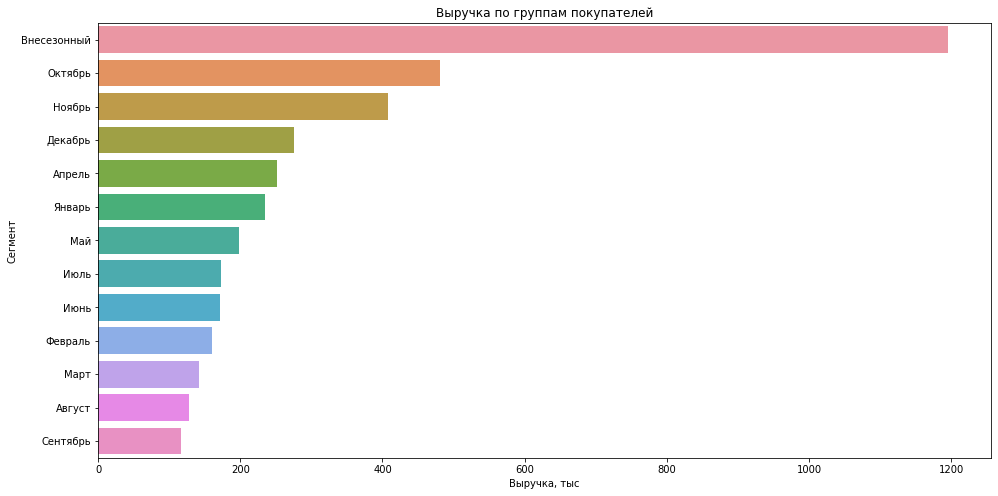

In [179]:
customer_month_pivot = pd.pivot_table(df_customer_month,
                                     index='seg_month',
                                     values='amount',
                                     aggfunc='sum').reset_index()
customer_month_pivot['amount'] = round((customer_month_pivot['amount'] / 1000), 2)

#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='amount', y='seg_month', data=customer_month_pivot.sort_values(by='amount', ascending=False)) 
ax.set_title('Выручка по группам покупателей')
ax.set_xlabel('Выручка, тыс')
ax.set_ylabel('Сегмент')
plt.show();

Больше всего выручки принесли покупатели, которые не отдают предпочтение конкретному месяцу, а совершали минимум в двух месяцах равнозначные покупки. Также в топ-3 входит октябрь и ноябрь, но сумма выручки в эти месяцы может быть выше в связи с тем, что месяцы с октября по январь в исходных данных представлены периодом за 2 года. Поэтому посмотрим средний чек.

In [180]:
avg_check_seg_3 = pd.pivot_table(df_customer_month,
                              index=['seg_month', 'order_id'],
                              values='amount',
                              aggfunc='sum').reset_index()

avg_check_seg_3 = avg_check_seg_3.groupby('seg_month').agg({'amount': 'mean'}).reset_index()

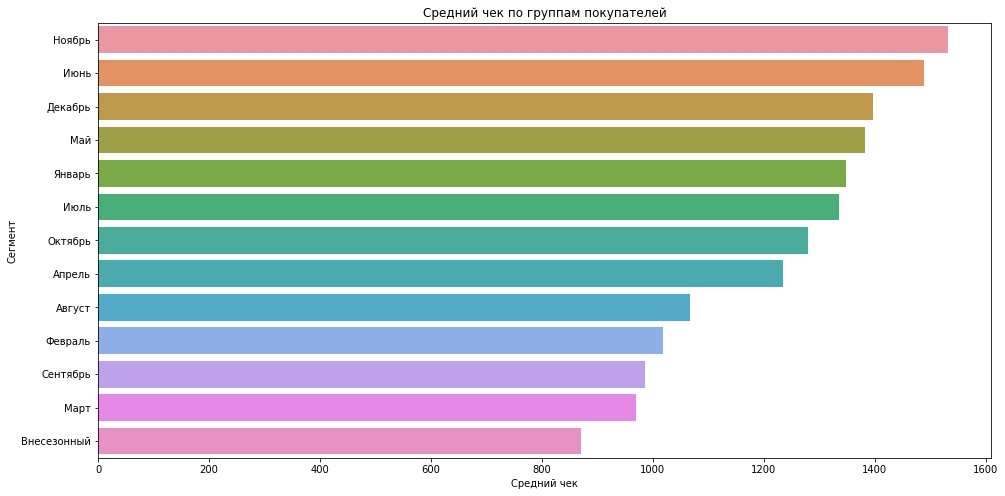

In [181]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='amount', y='seg_month', data=avg_check_seg_3.sort_values(by='amount', ascending=False)) 
ax.set_title('Средний чек по группам покупателей')
ax.set_xlabel('Средний чек')
ax.set_ylabel('Сегмент')
plt.show();

Влияние на средний чек крупного заказа совершённого в июне сильно заметно на графике.
Посмотрим на медианный чек.

In [182]:
median_check_seg_3 = pd.pivot_table(df_customer_month,
                              index=['seg_month', 'order_id'],
                              values='amount',
                              aggfunc='sum').reset_index()

median_check_seg_3 = median_check_seg_3.groupby('seg_month').agg({'amount': 'median'}).reset_index()

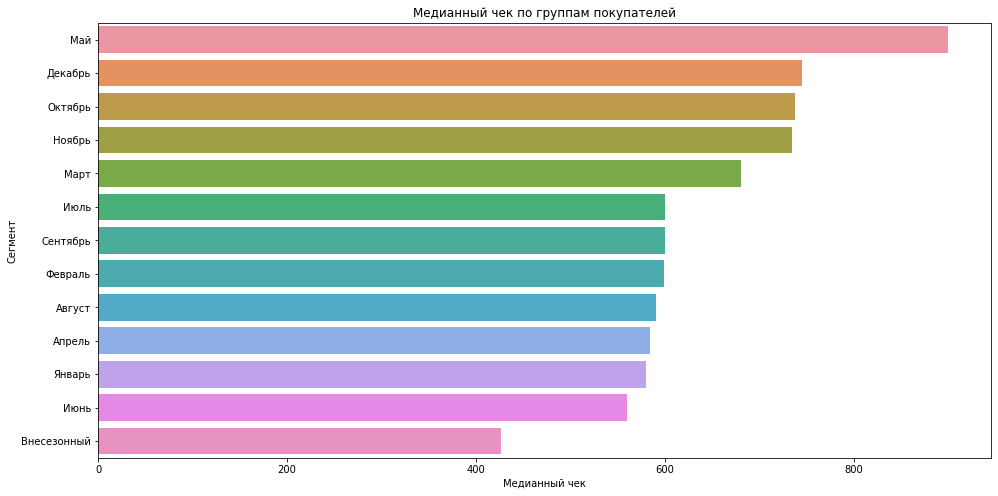

In [183]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='amount', y='seg_month', data=median_check_seg_3.sort_values(by='amount', ascending=False)) 
ax.set_title('Медианный чек по группам покупателей')
ax.set_xlabel('Медианный чек')
ax.set_ylabel('Сегмент')
plt.show();

Несмотря на то, что выручка покупателей, которые совершают покупки в разные сезоны самая большая - средний и медианный чек у этого сегмента самый низкий. Лидерами по медианному чеку является май и декабрь. Летние месяцы замыкают список вместе с внесезонными покупателями.

Сегментация по сезонности покупателей не является практичной, так как многие покупатели совершают покупки не отдавая предпочтения определённому месяцу. К тому же, чтобы говорить о сезонности наши данные представлены только одним полным годом, возможно при более длительном наблюдении будет возможно сделать выводы о сезонности покупателей.

### По категориям товаров

Разделить покупателей по категориям товаров, которые они преобретают

In [184]:
customer_сategories = pd.pivot_table(ecom,
                                    index='customer_id',
                                    columns='categories',
                                    values='amount',
                                    aggfunc='sum').reset_index()
customer_сategories['sum'] = customer_сategories.sum(axis=1)
customer_сategories['bathroom'] = round(customer_сategories['bathroom'] * 100 / customer_сategories['sum'], 2)
customer_сategories['cooking_items'] = round(customer_сategories['cooking_items'] * 100 / customer_сategories['sum'], 2)
customer_сategories['decor'] = round(customer_сategories['decor'] * 100 / customer_сategories['sum'], 2)
customer_сategories['household_facilities'] = round(customer_сategories['household_facilities'] * 100 / customer_сategories['sum'], 2)
customer_сategories['houseplant'] = round(customer_сategories['houseplant'] * 100 / customer_сategories['sum'], 2)
customer_сategories['other'] = round(customer_сategories['other'] * 100 / customer_сategories['sum'], 2)
customer_сategories['seedling'] = round(customer_сategories['seedling'] * 100 / customer_сategories['sum'], 2)
customer_сategories['storage'] = round(customer_сategories['storage'] * 100 / customer_сategories['sum'], 2)
customer_сategories['table_items'] = round(customer_сategories['table_items'] * 100 / customer_сategories['sum'], 2)
customer_сategories['textile'] = round(customer_сategories['textile'] * 100 / customer_сategories['sum'], 2)

customer_сategories.head(5)

categories,customer_id,bathroom,cooking_items,decor,household_facilities,houseplant,other,seedling,storage,table_items,textile,sum
0,000d6849-084e-4d9f-ac03-37174eaf60c4,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,2324.0


Теперь у нас есть таблица где у каждого окупателя отмечен процент суммы купленных товаров в каждой из категории.

Теперь мы можем добавить покупателя в категорию по категории товаров больше 50%, если клиент заказывает из разных категорий и ни одной из них нет больше 50% - тогда он попадает в категорию мультипокупатель.

In [185]:
def categorize_purpose(row):
    try:
        if row['bathroom'] > 50:
            return 'Предпочитает товары для ванной комнаты'
        elif row['cooking_items'] > 50:
            return 'Предпочитает товары для приготовления'
        elif row['decor'] > 50:
            return 'Предпочитает товары для декора'
        elif row['household_facilities'] > 50:
            return 'Предпочитает хозяйственные средства'
        elif row['houseplant'] > 50:
            return 'Предпочитает комнатные растения'
        elif row['other'] > 50:
            return 'Предпочитает товары из категории "Другие"'
        elif row['seedling'] > 50:
            return 'Предпочитает рассаду и семена'
        elif row['storage'] > 50:
            return 'Предпочитает товары для оганизации хранения'
        elif row['table_items'] > 50:
            return 'Предпочитает столовые приборы'
        elif row['textile'] > 50:
            return 'Предпочитает текстиль'
    except:
        return 'нет категории'

In [186]:
customer_сategories['seg_categories'] = customer_сategories.apply(categorize_purpose, axis=1)

In [187]:
customer_сategories['seg_categories'] = customer_сategories['seg_categories'].fillna('Мультипокупатель')

Посмотрим количество покупателей в каждой из категорий

In [188]:
customer_сategories.groupby('seg_categories')['customer_id'].count().sort_values(ascending=False)

seg_categories
Предпочитает товары для ванной комнаты         656
Предпочитает товары для оганизации хранения    485
Предпочитает рассаду и семена                  404
Предпочитает комнатные растения                201
Предпочитает товары для декора                 168
Предпочитает товары для приготовления          131
Предпочитает текстиль                          129
Предпочитает столовые приборы                  121
Предпочитает товары из категории "Другие"       90
Предпочитает хозяйственные средства             30
Мультипокупатель                                14
Name: customer_id, dtype: int64

Большее колиество покупателей не отдают предпочтение только одной категории товаров, их количество составляет 27,12% от общего количества покупателей.

Теперь мы создадим копию исходного датафрейма и сегментируем покупателей по категориям товаров.

In [189]:
df_customer_сategories = ecom
df_customer_сategories = df_customer_сategories.merge(customer_сategories[['customer_id', 'seg_categories']], 
                                                        how='left', 
                                                        on='customer_id')

Посмотрим, какую выручку принёс каждый из сегментов покупателей.

In [190]:
customer_сategories_pivot = pd.pivot_table(df_customer_сategories,
                                          index='seg_categories',
                                          values='amount',
                                          aggfunc='sum').reset_index()
customer_сategories_pivot['amount'] = customer_сategories_pivot['amount'] / 1000
customer_сategories_pivot

,seg_categories,amount
0,Мультипокупатель,199.248000
1,Предпочитает комнатные растения,162.529000
2,Предпочитает рассаду и семена,355.459333
3,Предпочитает столовые приборы,114.230000
4,Предпочитает текстиль,330.862500
5,Предпочитает товары для ванной комнаты,1064.661167
6,Предпочитает товары для декора,117.065667
7,Предпочитает товары для оганизации хранения,1202.800083
8,Предпочитает товары для приготовления,165.923667
9,"Предпочитает товары из категории ""Другие""",199.832000


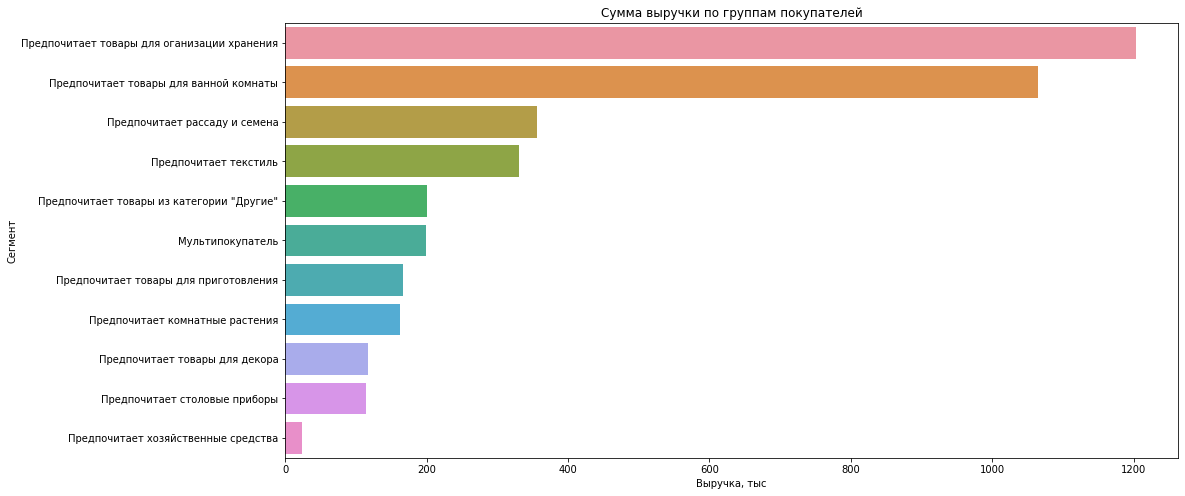

In [191]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='amount', y='seg_categories', data=customer_сategories_pivot.sort_values(by='amount', ascending=False)) 
ax.set_title('Сумма выручки по группам покупателей')
ax.set_xlabel('Выручка, тыс')
ax.set_ylabel('Сегмент')
plt.show();

Больше всего выручки принесли те, кто предпочитает товары для хранения и те, кто предпочитает товары для ванной комнаты.

Посмотрим на средний чек покупателей разных сегментов.

In [192]:
avg_check_seg_2 = pd.pivot_table(df_customer_сategories,
                              index=['seg_categories', 'order_id'],
                              values='amount',
                              aggfunc='sum').reset_index()

avg_check_seg_2 = avg_check_seg_2.groupby('seg_categories').agg({'amount': 'mean'}).reset_index()

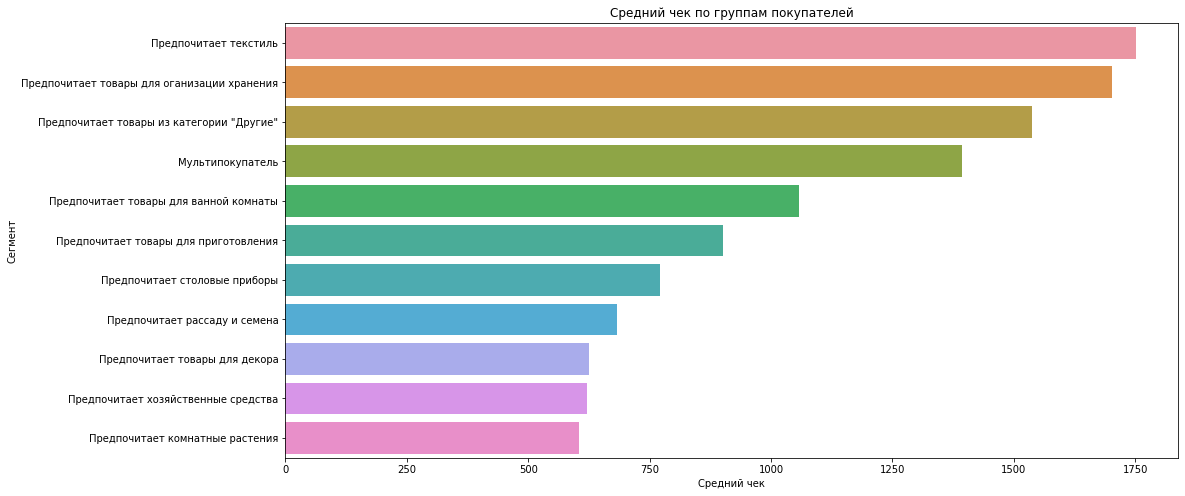

In [193]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='amount', y='seg_categories', data=avg_check_seg_2.sort_values(by='amount', ascending=False)) 
ax.set_title('Средний чек по группам покупателей')
ax.set_xlabel('Средний чек')
ax.set_ylabel('Сегмент')
plt.show();

Средний чек у покупателей которые предпочитают товары из категории "Другие", товары для организации хранения и текстиль выше других сегментов. Проверим медиану стоимости заказа.

In [194]:
median_check_seg = pd.pivot_table(df_customer_сategories,
                              index=['seg_categories', 'order_id'],
                              values='amount',
                              aggfunc='sum').reset_index()

median_check_seg = median_check_seg.groupby('seg_categories').agg({'amount': 'median'}).reset_index()

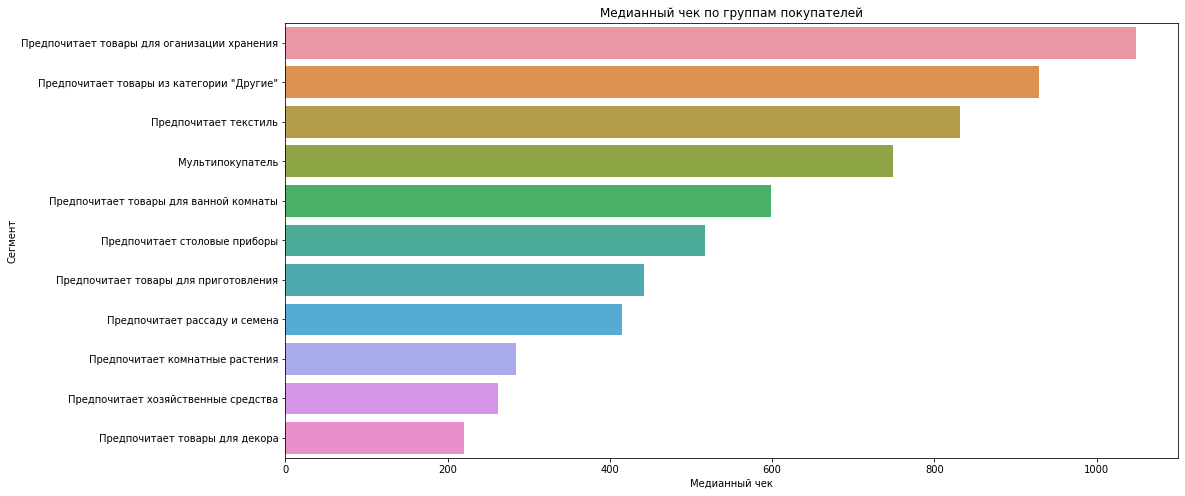

In [195]:
#строим график
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='amount', y='seg_categories', data=median_check_seg.sort_values(by='amount', ascending=False)) 
ax.set_title('Медианный чек по группам покупателей')
ax.set_xlabel('Медианный чек')
ax.set_ylabel('Сегмент')
plt.show();

По медиане суммы становятся меньше, так как медиана менее чувствительна к выбросам, но лидеры остаются теми же. По медиане чека выше всего значения покупателей предпочитающие совершать покупки в категории товары для хранения, далее идут другие, текстиль и мультипокупатели.

Посмотрим среднее количество заказов на одного покупателя в каждой из групп

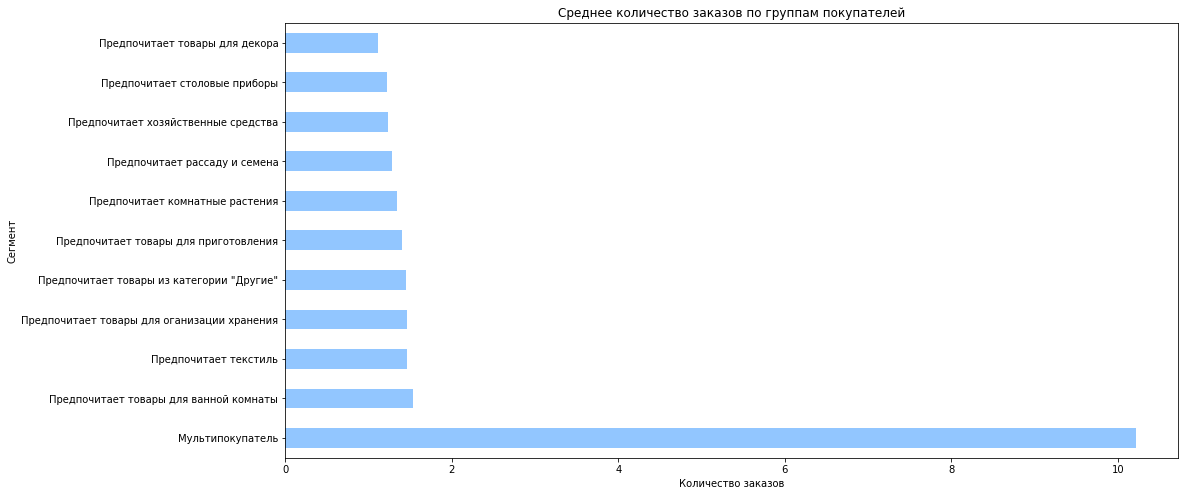

In [196]:
categories_orders = pd.pivot_table(df_customer_сategories,
                                   index=['seg_categories', 'customer_id', 'order_id'],
                                   values='amount',
                                   aggfunc='sum').reset_index()
categories_orders = pd.pivot_table(categories_orders,
                                   index=['seg_categories', 'customer_id'],
                                   values='order_id',
                                   aggfunc='count').reset_index()
categories_orders = categories_orders.groupby('seg_categories')['order_id'].agg('mean')

categories_orders.sort_values(ascending=False).plot.barh(figsize=(16, 8))
plt.title('Среднее количество заказов по группам покупателей')
plt.xlabel('Количество заказов')
plt.ylabel('Сегмент')
plt.show();

Мультипокупатели в среднем совершают более 10 заказов, остальные категории покупателей менее двух.

Для дальнейшей работы будем использовать сегментацию покупателей по категориям товаров, которые они покупают, так как такая сегментизация позволит подготовить персональные предложения, а также проанализировать, в каких категориях товаров покупатели заинтересованы больше всего, изучить потребности и скорректировать ассортиментную матрицу в соответсвии с ними, а также предложить решения из других уже имеющихся категорий в ассортименте как сопутствующие.

## Проверка гиптез

Сформулируем гипотезы и проверим гипотезы на основе полученных результатов

### Выручка мультипокупателей

Выясним, действительно ли покупатели, совершающие покупки в разных категориях приносят магазину большую выручку. По суммарной выручке мультипокупатель опережает все остальные категории, но при этом мультипокупателей большее количество и у них довольно низкий средний чек относитльно остальных сегментов.

Если гипотеза окажется верной, то нужно уделить внимание покупателям, совершающим покупки отдающих предпочтение одной категории и стимулировать расширение сферы покупательского опыта за счёт рекламных кампаний и других средств.

Будем сравнивать сегмент "Мультипокупатель" и другие сегменты.

**Формулируем нулевую гипотезу:** Покупатели совершающие покупки в разных категориях приносят такую же выручку, как и покупатели отдающие предпочтения конкретной категории.

**Формулируем альтернативную одностороннюю гипотезу (правосторонняя):** Покупатели совершающие покупки в разных категориях приносят  выручку больше, чем покупатели отдающие предпочтения конкретной категории.

In [197]:
multi_amount = df_customer_сategories[df_customer_сategories['seg_categories'] == 'Мультипокупатель']
multi_amount = multi_amount.groupby('customer_id')['amount'].sum()
all_amount = df_customer_сategories[df_customer_сategories['seg_categories'] != 'Мультипокупатель']
all_amount = all_amount.groupby('customer_id')['amount'].sum()

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(multi_amount, all_amount, alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.14049940940680256
Не отвергаем нулевую гипотезу


Мы не отвергаем нулевую гипотезу, отдельный мультипокупатель не приносит выручки больше, чем покупатель, отдающий предпочтение какой-либо категории.

### Количество заказов мультипокупателей

Выясним, действительно ли покупатели предпочитающие товары из разных категорий чаще совершают повторные покупки. Если гипотеза окажется верной, то есть повод предлагать другим категорям ассортимент других категорий товаров. А также исследовать опыт совершения покупок данной категории и распространить на другие категории по возможности, чтобы другие сегменты также возвращались за покупками чаще.

**Формулируем нулевую гипотезу:** Покупатели не отдающие предпочтение какой либо категории товаров совершают столько же заказов, как и остальные сегменты.

**Формулируем альтернативную одностороннюю гипотезу (правосторонняя):** Покупатели не отдающие предпочтение какой либо категории товаров совершают больше заказов, чем другие сегменты.


In [198]:
multi_count_orders = df_customer_сategories[df_customer_сategories['seg_categories'] == 'Мультипокупатель']
multi_count_orders = pd.pivot_table(multi_count_orders,
                                    index=['customer_id', 'order_id'],
                                    values='amount',
                                    aggfunc='sum').reset_index()
multi_count_orders = multi_count_orders.groupby('customer_id')['order_id'].count()

all_count_orders = df_customer_сategories[df_customer_сategories['seg_categories'] != 'Мультипокупатель']
all_count_orders = pd.pivot_table(all_count_orders,
                                  index=['customer_id', 'order_id'],
                                  values='amount',
                                  aggfunc='sum').reset_index()
all_count_orders = all_count_orders.groupby('customer_id')['order_id'].count()

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(multi_count_orders, all_count_orders, alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.17018651004393848
Не отвергаем нулевую гипотезу


Не отвергаем нулевую гипотезу, покупатели, не одающие предпочтение какой либо категории товаров не совершают больше заказов.

### Средний чек сегмента других товаров

Выясним, действительно ли у покупателей, предпочитающих товары из категории "Другие" выше средний чек относительно других сегментов. Если гипотеза окажется верной, то есть повод предлагать другим категорям ассортимент категории товаров "Другие". А также исследовать опыт совершения покупок данной категории, выяснить почему именно в этой категории средний чек выше и как распространить опыт данной категории на другие сегменты пользователей.

**Формулируем нулевую гипотезу:** Покупатели предпочитающих товары из категории "Другие" имеют такой же средний чек, как и остальные сегменты.

**Формулируем альтернативную одностороннюю гипотезу (правосторонняя):** У покупателей, предпочитающих товары из категории "Другие", выше средний чек, чем у других сегментов.

In [199]:
other_amount = df_customer_сategories[df_customer_сategories['seg_categories'] == 'Предпочитает товары из категории "Другие"']
other_amount = other_amount.groupby('order_id')['amount'].sum()
all_amount = df_customer_сategories[df_customer_сategories['seg_categories'] != 'Предпочитает товары из категории "Другие"']
all_amount = all_amount.groupby('order_id')['amount'].sum()

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(other_amount, all_amount, alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.0035166095477146093
Отвергаем нулевую гипотезу


Отвергаем нулевую гиптезу, так как средний чек покупателей прдпочитающих категорию "Другие" выше, чем у остальных сегментов.

## Выводы и рекомендации

Представляем выводы и рекомендации, которые могут помочь в разработке более
персонализированных предложений для покупателей.

Мы провели исследовательский анализ данных интернет-магазина товаров для дома "Пока все ещё тут", чтобы обнаружить группы клиентов, похожих друг на друга, и проверить несколько статистических гипотез.

Данные по покупкам представлены за 487 дней с 1 октября 2018 года по 31 января 2020 года. Мы разделили данные на 10 категорий.

В процессе исследования мы удилили крупный заказ, являющийся тестовым на 1000 вантузов из категории товаров для ванн, сформированный - 18.06.2019.

**Выручка и средний чек**

Мы обнаружили общее падение выручки магазина. В данных присутствовали несколько скачков роста, в апреле, октябре и декабре 2019 года, но рост этот исключительно по отношению к предыдущему месяцу, общая тенденция направлена на снижение выручки. Самая высокая выручка - октябрь 2018 года.

По дням недели выручка выше в будние дни, больше всего магазин заработал за вторники. Средний чек в будние дни также выше, чем в выходные, самый высокий средний чек также во вторник. Средний чек в течении года находися между 800 и 1400. Всего покупателей 2 429. Средняя выручка с одного покупателя - 1620,25, 75% процентов покупателей приносят компании до 2000.

Общая выручка магазина за исследуемый период: 4 967 734.

**Заказы**

В среднем покупатели совершают более 1,45 заказов, при этом 63,2% покупателей не совершали повторные покупки, общее количество заказов: 3489 шт. Самое большое количество заказов у трёх отдельных покупателей, которые оформили 126, 35 и 17 заказов. Эти покупатели совершали аказы преимущественно в категориях товаров для организации хранения и товарах для ванны и уборки.

**Товарные категории**

По объёму выручки среди товарных категорий лидируют товары для организации хранения (1,36 млн) и товары для ванных комнат (1,19 млн), по количеству проданных товаров лидируют рассада и семена (3 661 шт), и товары для декора (2 112 шт). Меньше всего и по выручке и по объёму принесли хозяйственые средства(30 090 за 418 шт). Однозначно сезонным товаром можно назвать рассаду и семена, все остальные категории продаются в большем и меньшем объёме, но об однозначной зависимости сказать нельзя, так как рост объёма продаж наблюдается в разные временные промежутки.

**Сегментирование покупателей**

Для сегментирования покупателей мы выбрали сегментацию по категориям товаров, которые они покупают, так как такая сегментизация позволит подготовить персональные предложения, а также проанализировать, в каких категориях товаров покупатели заинтересованы больше всего, изучить потребности и скорректировать ассортиментную матрицу в соответсвии с ними, а также предложить решения из других уже имеющихся категорий в ассортименте как сопутствующие.

*Выручка:* больше всего суммарно выручки те, кто предпочитает товары для хранения и те, кто предпочитает товары для ванной комнаты. 

*Средний чек:* у покупателей которые предпочитают товары из категории "Другие", товары для организации хранения и текстиль средний чек выше других сегментов.

*Количество заказов:* Среднее количество заказов у мультипокупателей - 10. У  остальных категорий среднее количество - менее двух.


**Проверка гипотез**

На основе проведённого исследования мы выдвинули несколько гипотез. 

Гипотеза о том, что покупатели, не отдающие предпочтение какой-либо категории товаров приносят магазину бо́льшую выручку была отвергнута, так как отдельный мульипокупатель не приносит выручки больше, чем покупатель отдающий педпочтение какой-либо категории.

Гипотеза о том, что покупатели, не отдающие предпочтение какой-либо категории товаров, была также отвергнута.

Гиптеза о том, что средний чек у покупателей, препочитающих категорию "Другие" не была отвергнута, действительно, средний чек покупателей предпоитающих категорию "Другие" - выше средний чек.

На основе проведённого исследования основные рекомендации: повышение среднего чека и увеличение процента покупателей, которые совершают повторные покупки. Также стоит предлагать другим сегментам ассортимент категории товаров "Другие". А также исследовать опыт совершения покупок данной категории, выяснить почему именно в этой категории средний чек выше и как распространить опыт данной категории на другие сегменты пользователей. 